In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_10_0000.csv'

In [3]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [4]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period      s1a     s1x     s1i  \
datetime                                                                     
2013-03-10 00:10:00  2013-03-10  00:10:00     600  3.35597  4.2143  2.6078   
2013-03-10 00:20:00  2013-03-10  00:20:00     600  3.96644  4.6274  2.9291   
2013-03-10 00:30:00  2013-03-10  00:30:00     600  3.81038  4.1684  3.5258   
2013-03-10 00:40:00  2013-03-10  00:40:00     600  3.92054  4.2143  3.6176   
2013-03-10 00:50:00  2013-03-10  00:50:00     600  4.20512  4.6274  3.7094   

                         s1s      s2a     s2x     s2i  ...  tii  vxa  vxx  \
datetime                                               ...                  
2013-03-10 00:10:00  0.43146  3.33661  4.1674  2.6068  ...   44  125  125   
2013-03-10 00:20:00  0.33048  3.94708  4.5346  2.9740  ...   44  125  125   
2013-03-10 00:30:00  0.11934  3.78643  4.1215  3.5248  ...   45  125  125   
2013-03-10 00:40:00  0.11934  3.89200  4.1674  3.5707  ...   45  125  125   
2013-03-10 00:50:00  0.19278  4.19035  4.6723  3.7084  ...   45  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-10 00:10:00  125   83   83   83   83   83   83  
2013-03-10 00:20:00  125   83   83   83   83   83   83  
2013-03-10 00:30:00  125   83   83   83   83   83   83  
2013-03-10 00:40:00  125   83   83   83   83   83   83  
2013-03-10 00:50:00  125   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       4.393374
std        2.141741
min        1.340960
25%        2.872872
50%        3.619895
75%        5.692280
max       10.158350
Name: s1a, dtype: float64


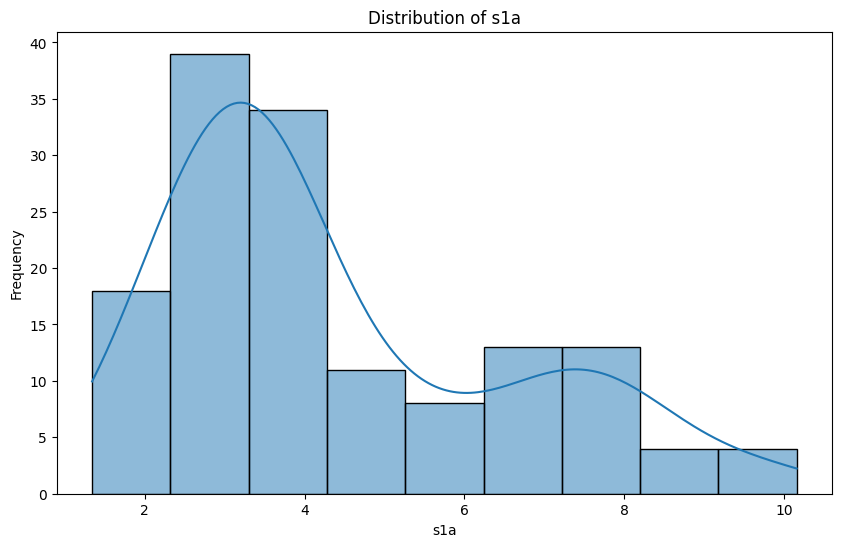


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       5.073012
std        2.232758
min        1.827500
25%        3.652025
50%        4.260200
75%        6.509300
max       11.007500
Name: s1x, dtype: float64



Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       3.687725
std        2.054131
min        0.450500
25%        2.148800
50%        2.997950
75%        4.971650
max        9.079700
Name: s1i, dtype: float64


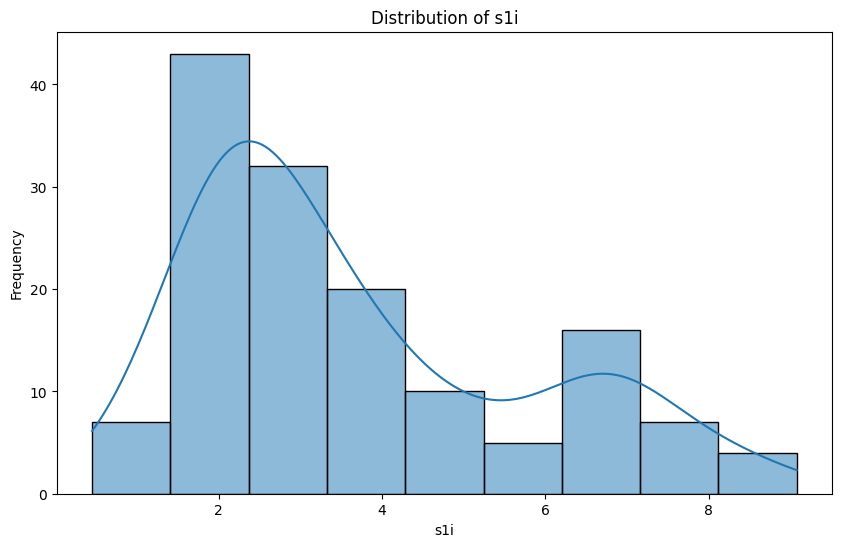


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.281488
std        0.115647
min        0.096390
25%        0.205403
50%        0.266220
75%        0.331627
max        0.757350
Name: s1s, dtype: float64


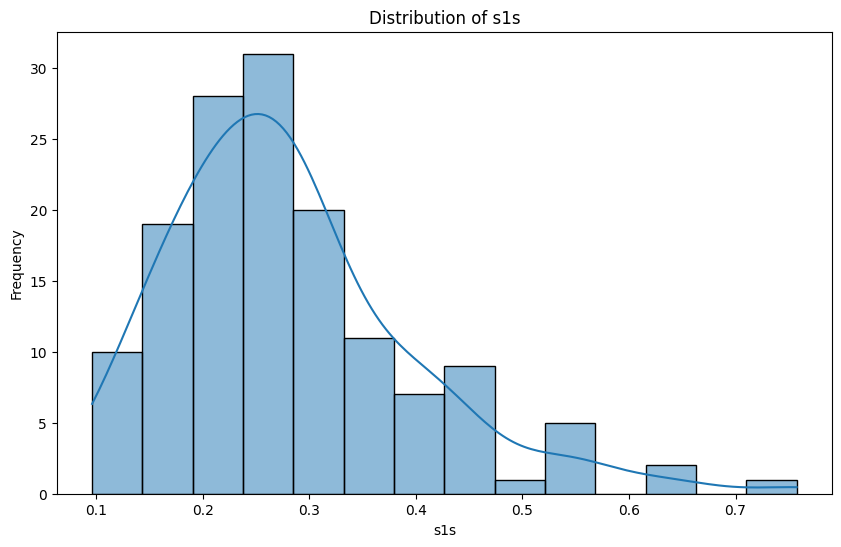


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       4.374970
std        2.121011
min        1.372090
25%        2.874167
50%        3.607420
75%        5.680953
max       10.060960
Name: s2a, dtype: float64



Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       5.059900
std        2.223587
min        1.826500
25%        3.616600
50%        4.259200
75%        6.462400
max       10.914700
Name: s2x, dtype: float64


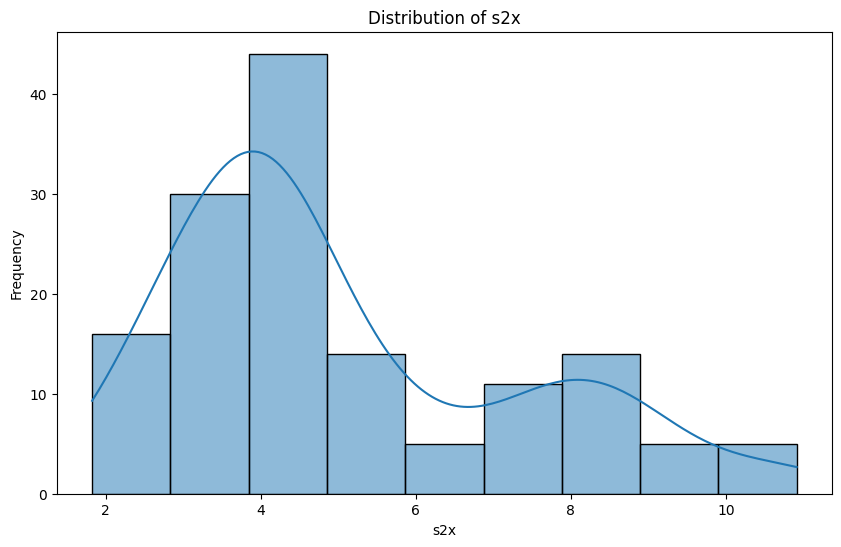


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       3.665688
std        2.033411
min        0.403600
25%        2.193700
50%        2.996950
75%        4.936225
max        9.032800
Name: s2i, dtype: float64



Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.283114
std        0.117025
min        0.096390
25%        0.205403
50%        0.266220
75%        0.322447
max        0.784890
Name: s2s, dtype: float64


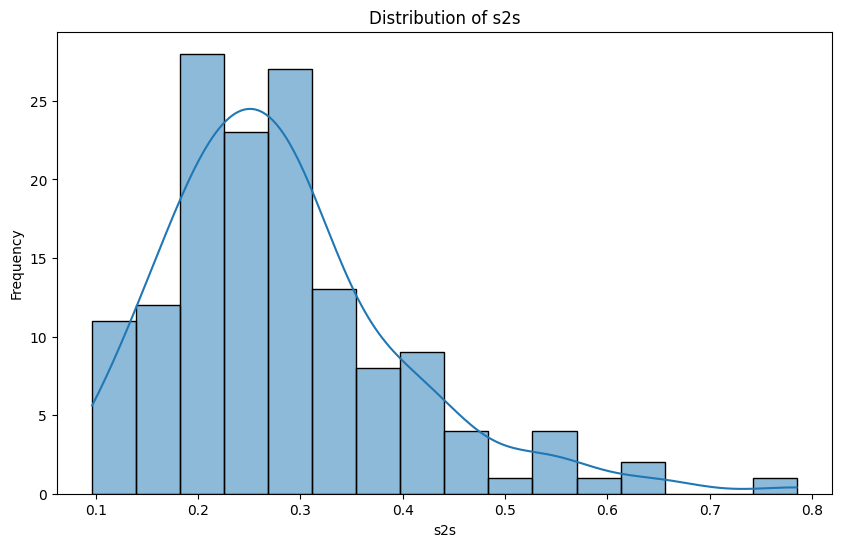


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       4.162946
std        1.941834
min        1.383510
25%        2.796305
50%        3.452250
75%        5.473965
max        8.915370
Name: s3a, dtype: float64


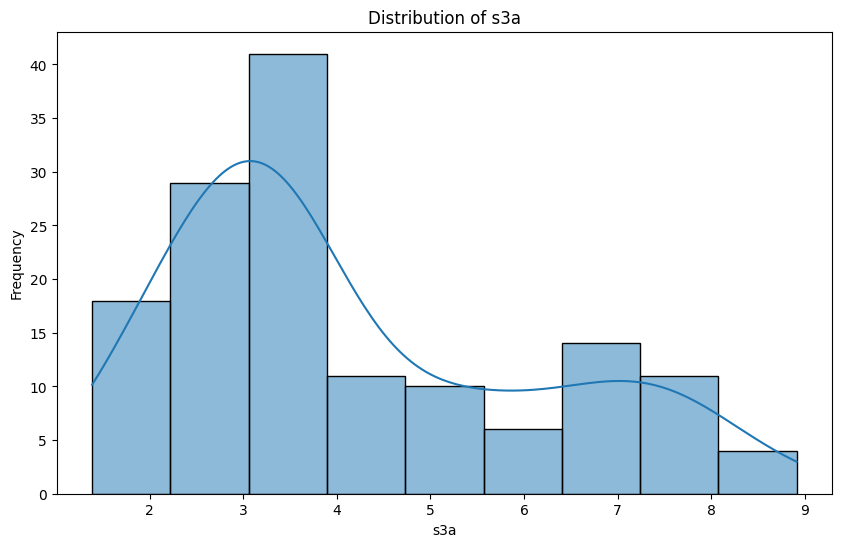


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       4.932001
std        2.097726
min        1.828450
25%        3.514172
50%        4.167820
75%        6.484255
max       10.222660
Name: s3x, dtype: float64


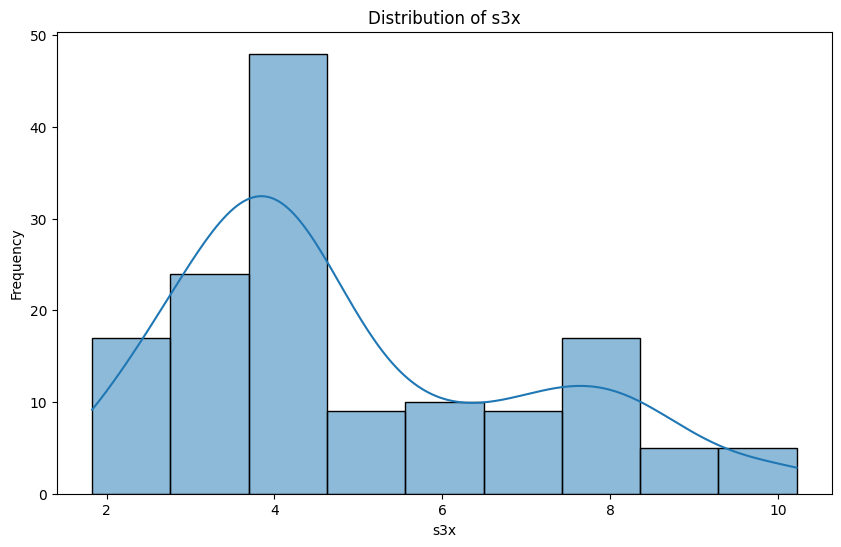


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       3.354583
std        1.785355
min        0.635830
25%        2.046333
50%        2.745850
75%        4.718260
max        7.424590
Name: s3i, dtype: float64


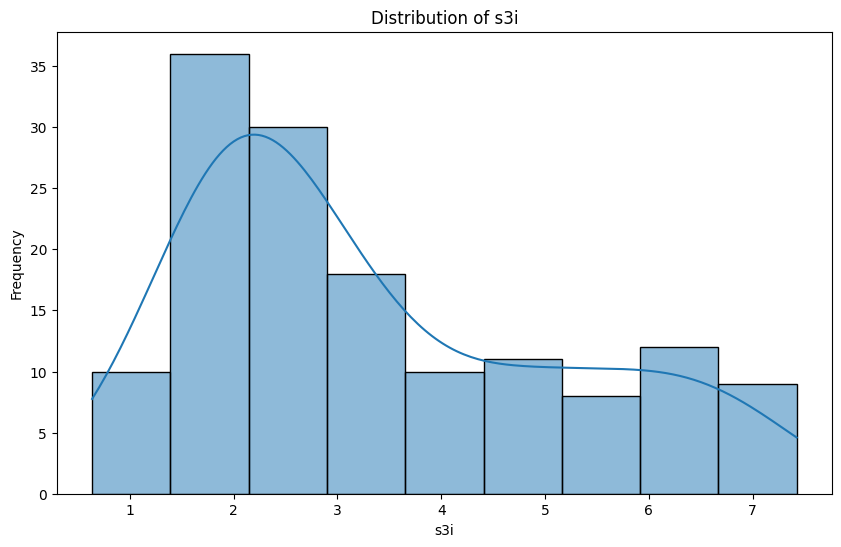


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.309208
std        0.127837
min        0.087150
25%        0.224760
50%        0.295865
75%        0.357790
max        0.972440
Name: s3s, dtype: float64


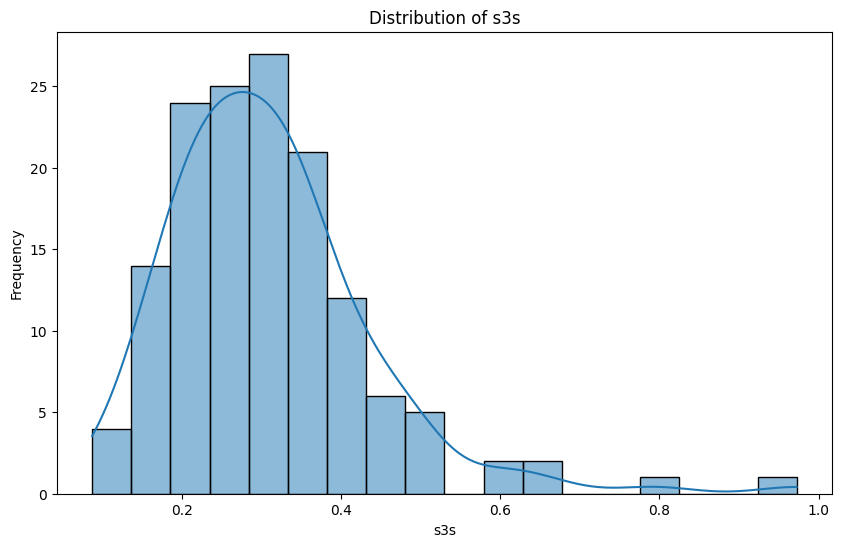


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     165.611111
std      152.463092
min        1.000000
25%       24.750000
50%       50.000000
75%      326.250000
max      360.000000
Name: d1a, dtype: float64


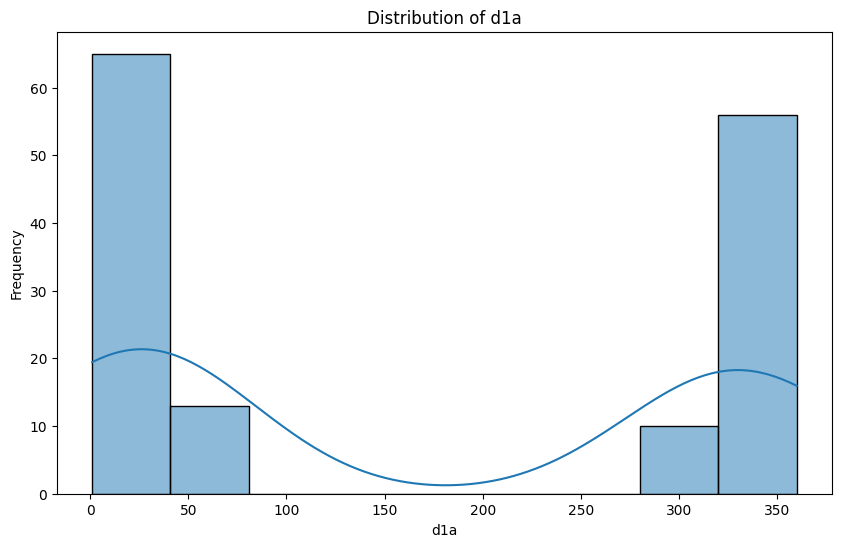


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       5.159722
std        2.822644
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       18.000000
Name: d1s, dtype: float64


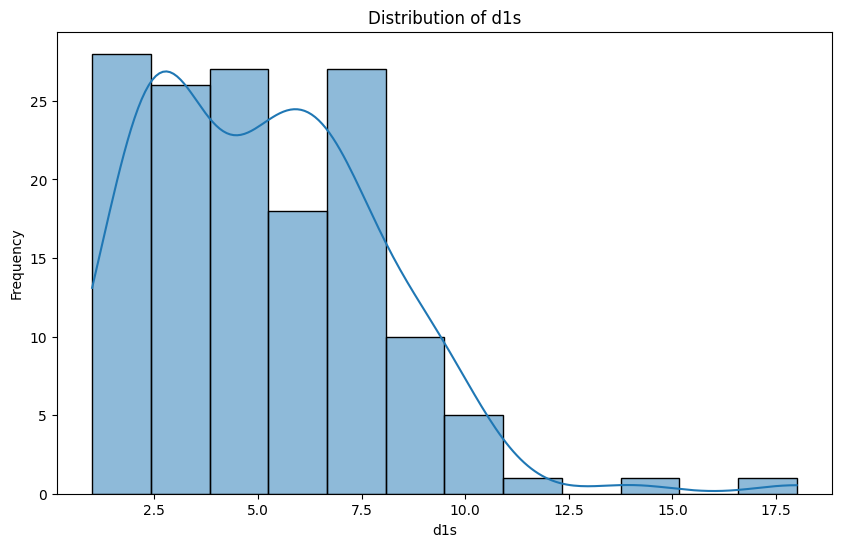


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     201.666667
std      151.776059
min        1.000000
25%       29.000000
50%      312.000000
75%      331.000000
max      360.000000
Name: d2a, dtype: float64


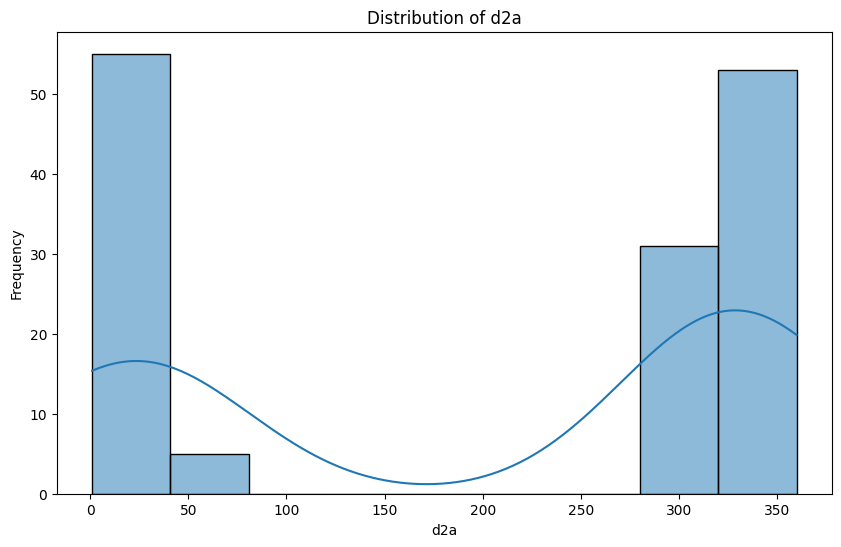


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       6.576389
std        2.510342
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       17.000000
Name: d2s, dtype: float64


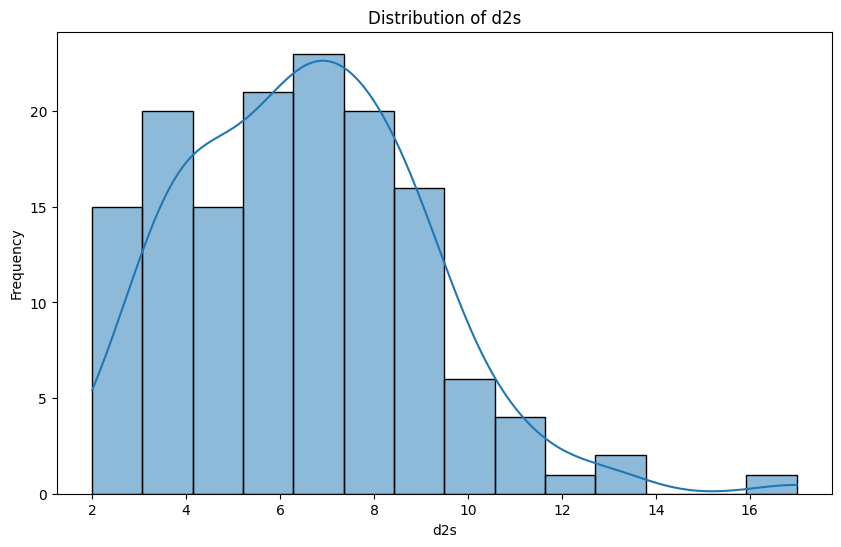


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean     106.069444
std        0.403703
min      105.000000
25%      106.000000
50%      106.000000
75%      106.000000
max      107.000000
Name: h1a, dtype: float64


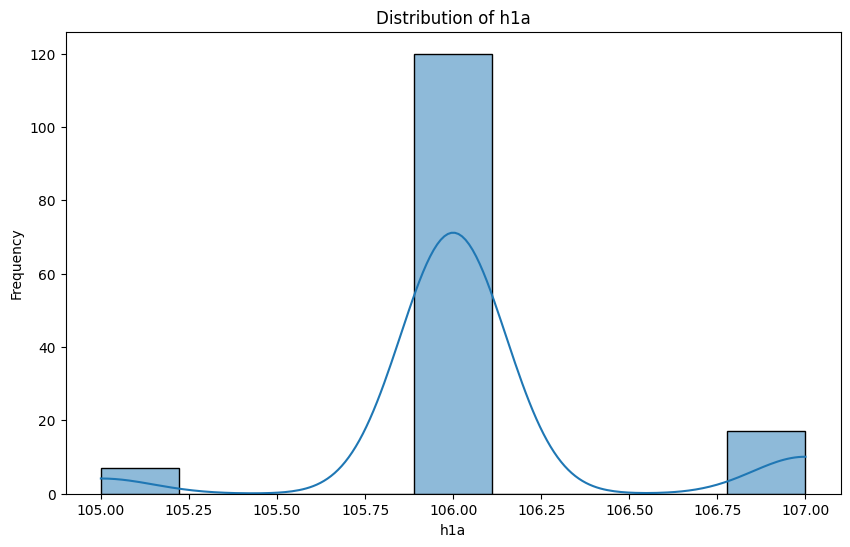


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean     106.208333
std        0.513796
min      105.000000
25%      106.000000
50%      106.000000
75%      106.000000
max      108.000000
Name: h1x, dtype: float64


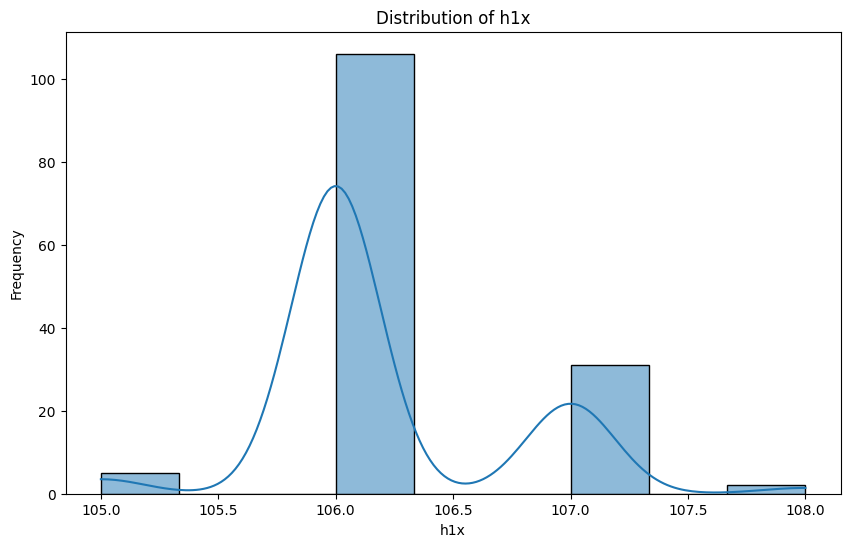


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean     105.805556
std        0.639906
min      103.000000
25%      106.000000
50%      106.000000
75%      106.000000
max      107.000000
Name: h1i, dtype: float64


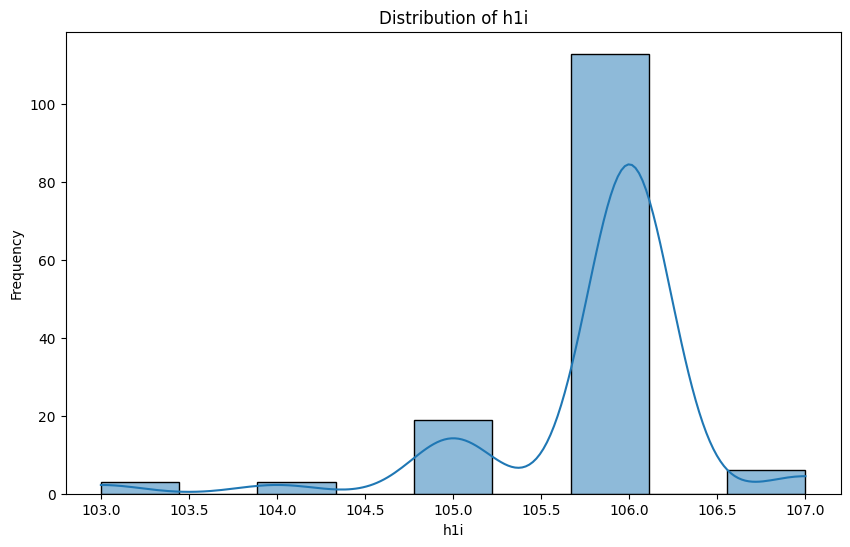


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean       6.844444
std        1.668749
min        4.450000
25%        5.250000
50%        6.650000
75%        8.475000
max        9.350000
Name: t1a, dtype: float64


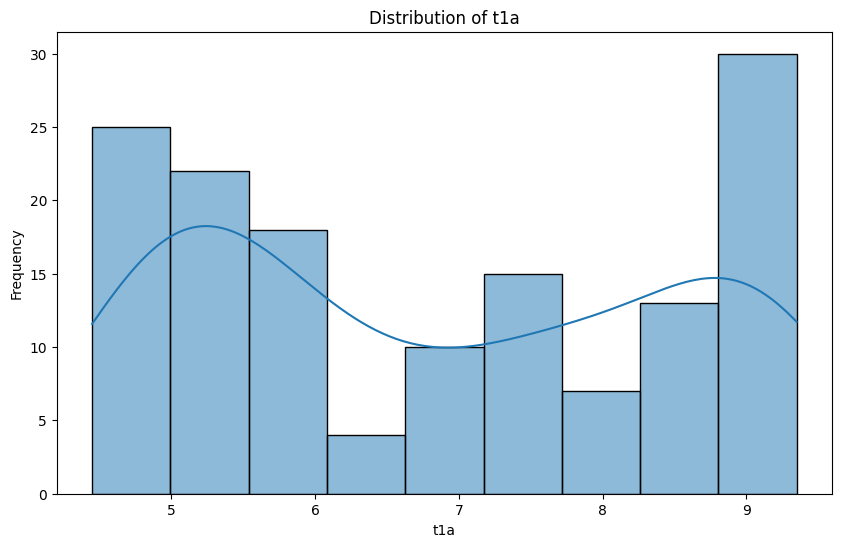


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean       6.950694
std        1.725437
min        4.550000
25%        5.325000
50%        6.700000
75%        8.850000
max        9.550000
Name: t1x, dtype: float64


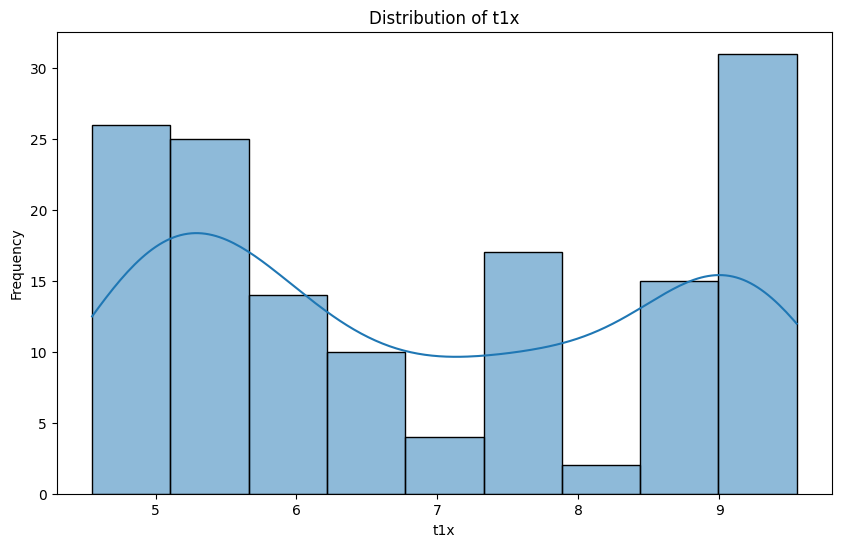


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean       6.731250
std        1.610584
min        4.450000
25%        5.150000
50%        6.600000
75%        8.350000
max        9.350000
Name: t1i, dtype: float64


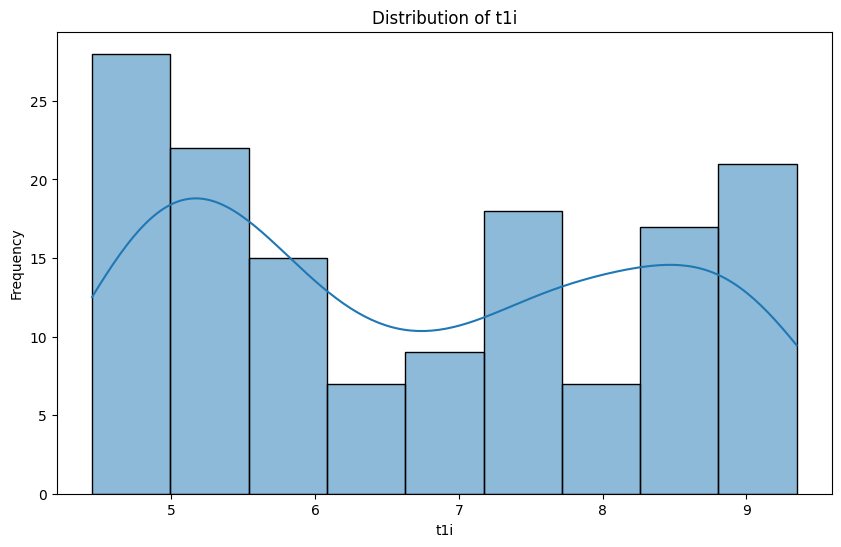


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1002.277778
std         1.516549
min       999.000000
25%      1001.000000
50%      1002.000000
75%      1004.000000
max      1004.000000
Name: b1a, dtype: float64



Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1002.583333
std         1.416684
min       999.000000
25%      1002.000000
50%      1002.000000
75%      1004.000000
max      1005.000000
Name: b1x, dtype: float64


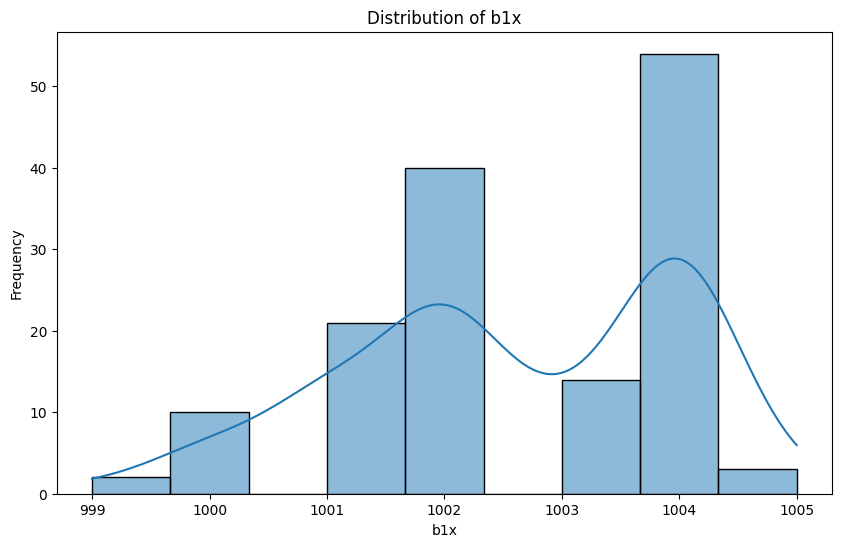


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1001.986111
std         1.550935
min       999.000000
25%      1001.000000
50%      1002.000000
75%      1003.000000
max      1004.000000
Name: b1i, dtype: float64


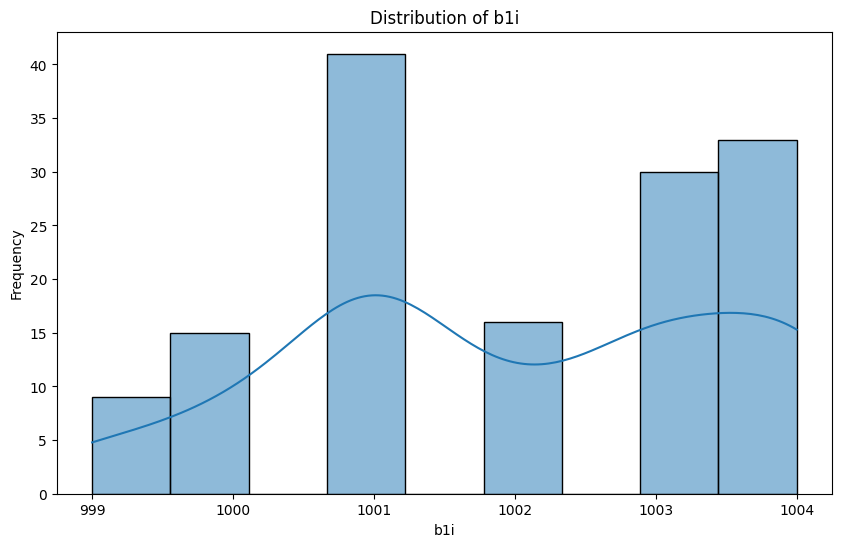


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       3.594953
std        1.414851
min        1.227530
25%        2.507893
50%        3.233470
75%        4.793510
max        7.123840
Name: p1a, dtype: float64



Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       4.457026
std        1.678972
min        1.557650
25%        3.150937
50%        4.056475
75%        5.764387
max        8.756100
Name: p1x, dtype: float64


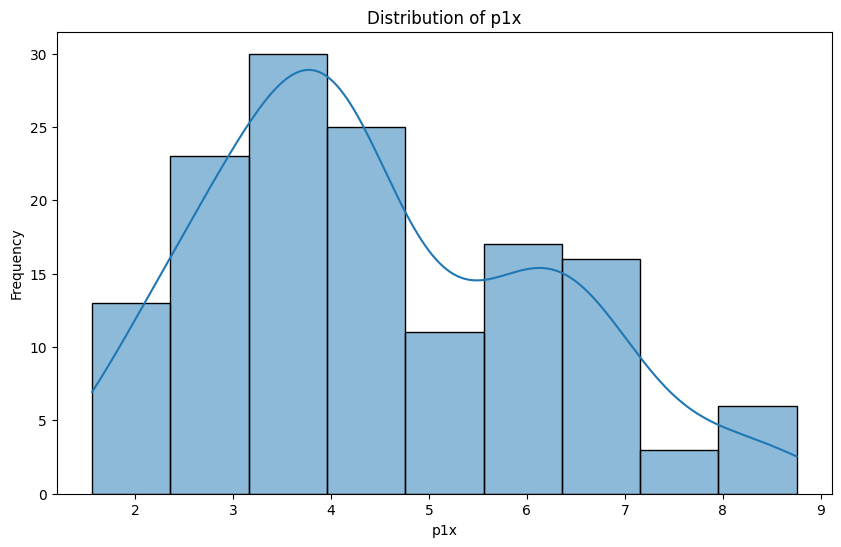


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       2.672697
std        1.177654
min        0.686500
25%        1.786900
50%        2.428800
75%        3.666750
max        5.821700
Name: p1i, dtype: float64



Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.340821
std        0.120046
min        0.091700
25%        0.256760
50%        0.325540
75%        0.413798
max        0.701510
Name: p1s, dtype: float64


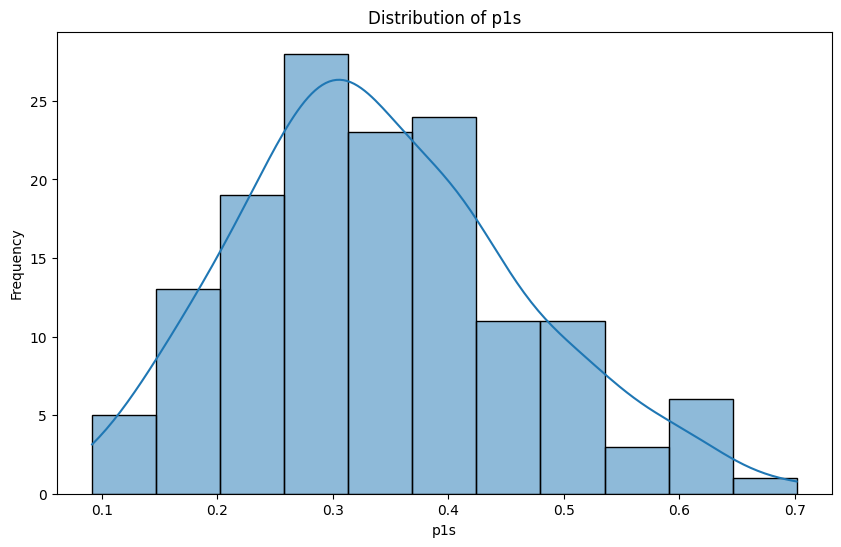


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      46.916667
std        1.469979
min       44.000000
25%       45.000000
50%       47.000000
75%       48.000000
max       49.000000
Name: tia, dtype: float64


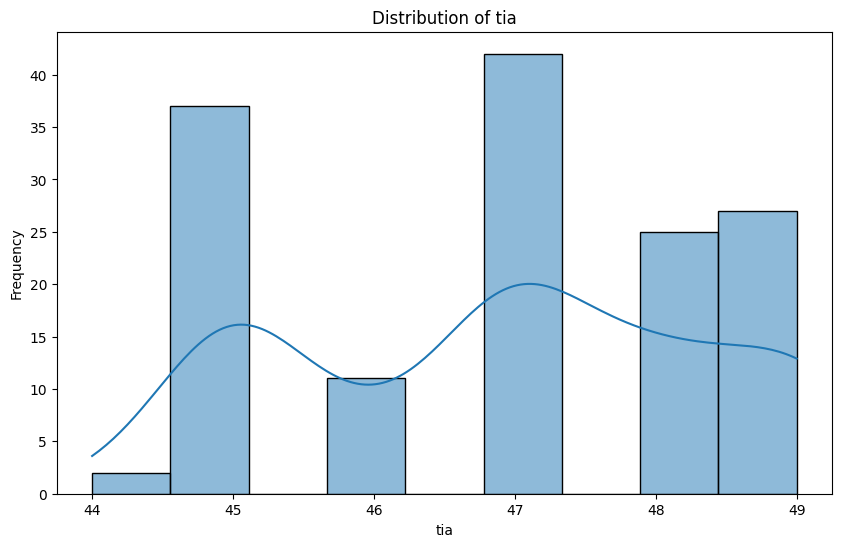


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      46.937500
std        1.454286
min       44.000000
25%       45.000000
50%       47.000000
75%       48.000000
max       49.000000
Name: tix, dtype: float64


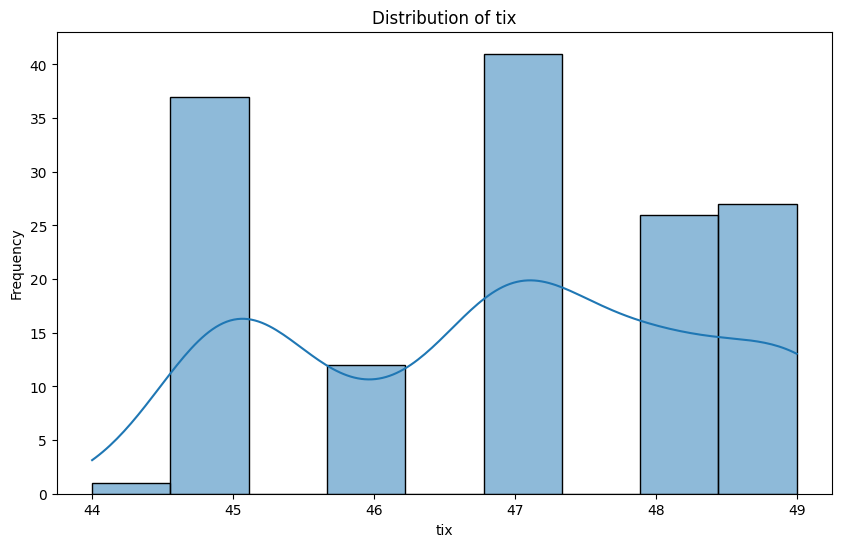


Analysis for column: tii
Descriptive Statistics:
count    144.00000
mean      46.87500
std        1.44781
min       44.00000
25%       45.00000
50%       47.00000
75%       48.00000
max       49.00000
Name: tii, dtype: float64


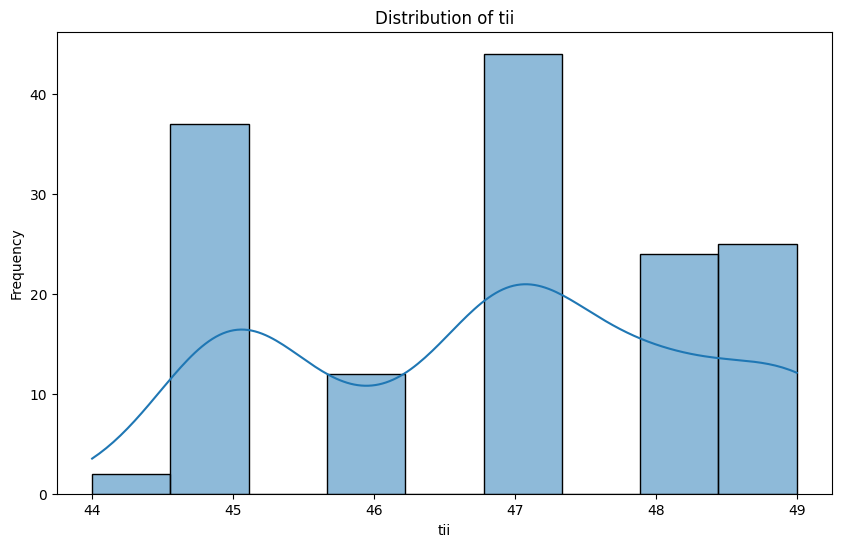


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     128.958333
std        4.566333
min      125.000000
25%      126.000000
50%      127.000000
75%      132.000000
max      138.000000
Name: vxa, dtype: float64


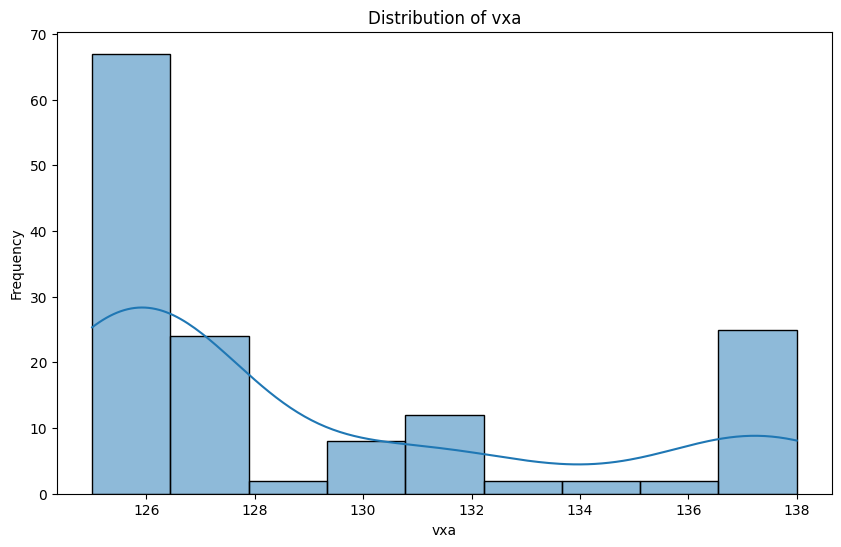


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     129.361111
std        4.991757
min      125.000000
25%      126.000000
50%      127.000000
75%      132.000000
max      140.000000
Name: vxx, dtype: float64


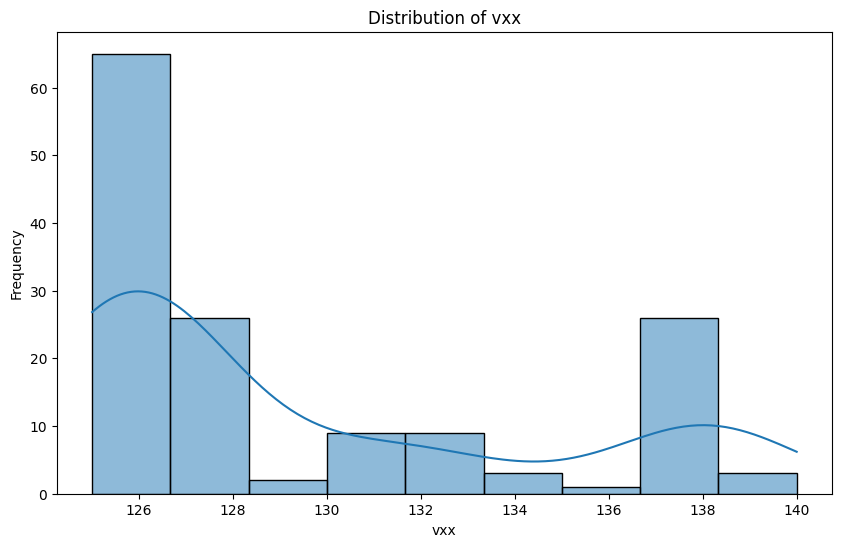


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     128.583333
std        4.273025
min      124.000000
25%      125.000000
50%      127.000000
75%      131.000000
max      138.000000
Name: vxi, dtype: float64


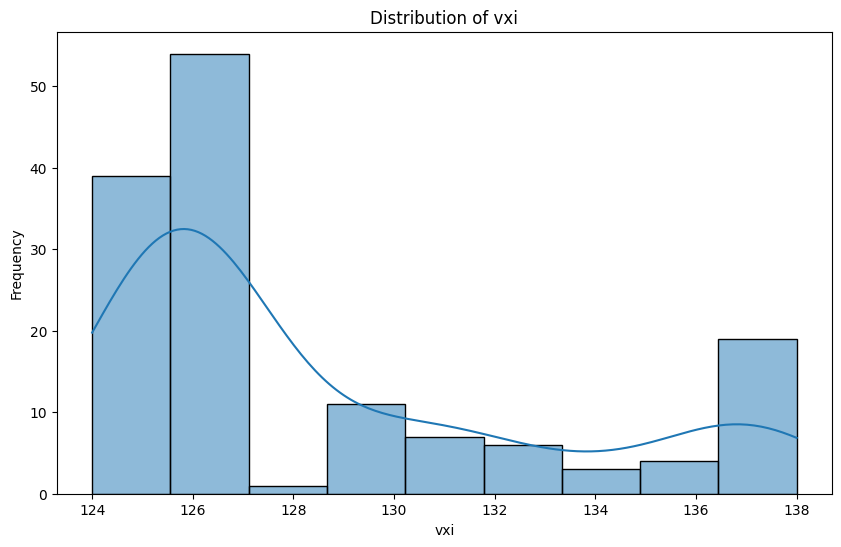


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


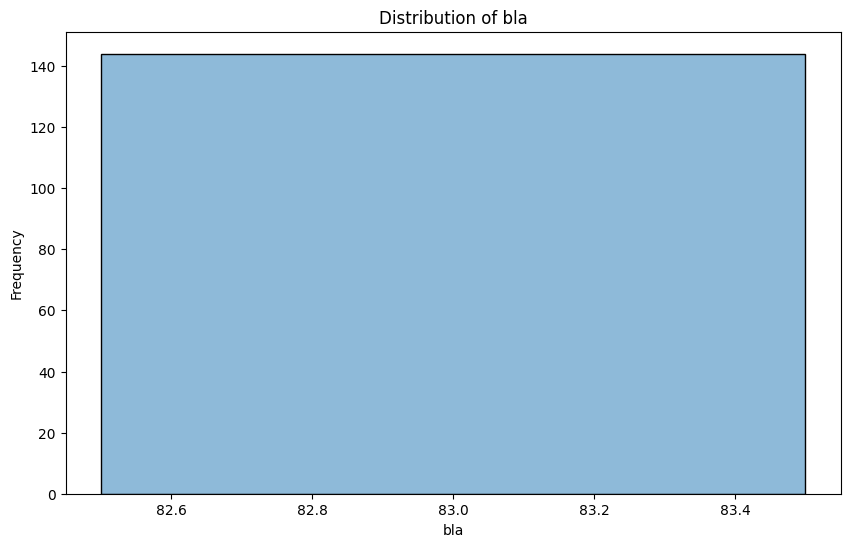


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


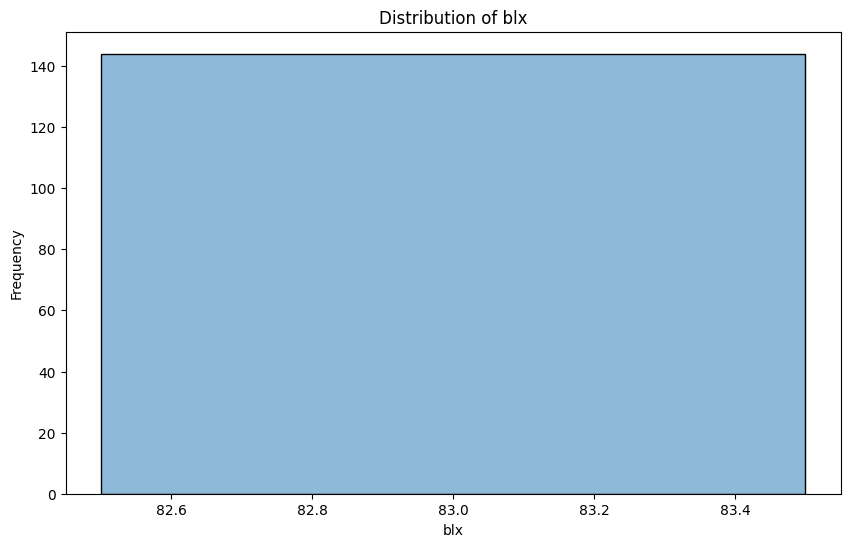


Analysis for column: bli
Descriptive Statistics:
count    144.000000
mean      82.993056
std        0.083333
min       82.000000
25%       83.000000
50%       83.000000
75%       83.000000
max       83.000000
Name: bli, dtype: float64


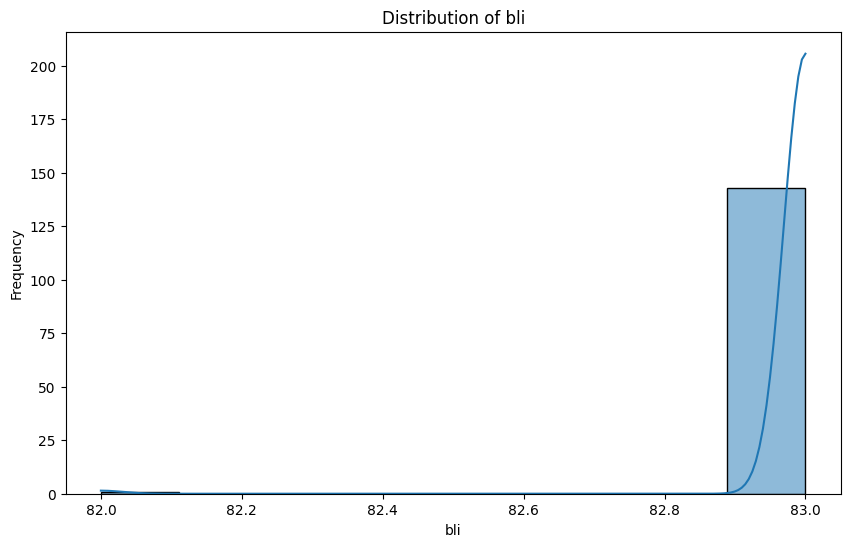


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


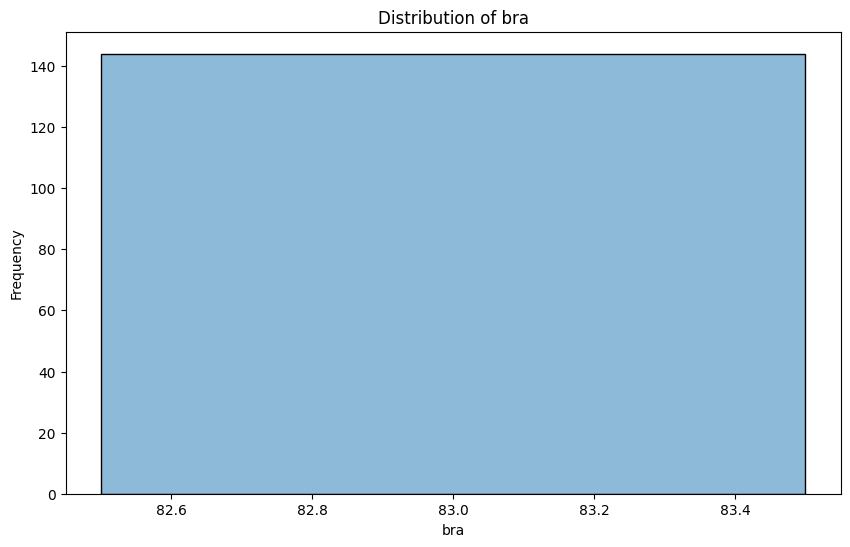


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


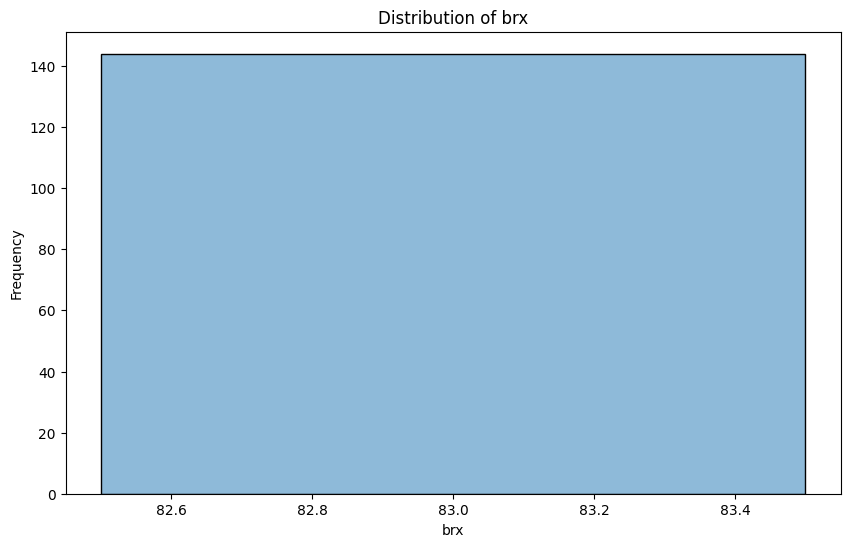


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


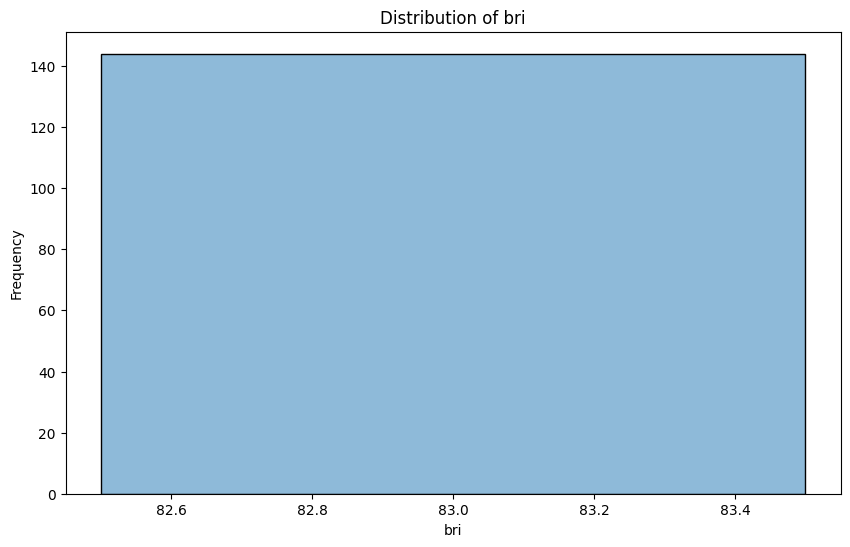

In [5]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

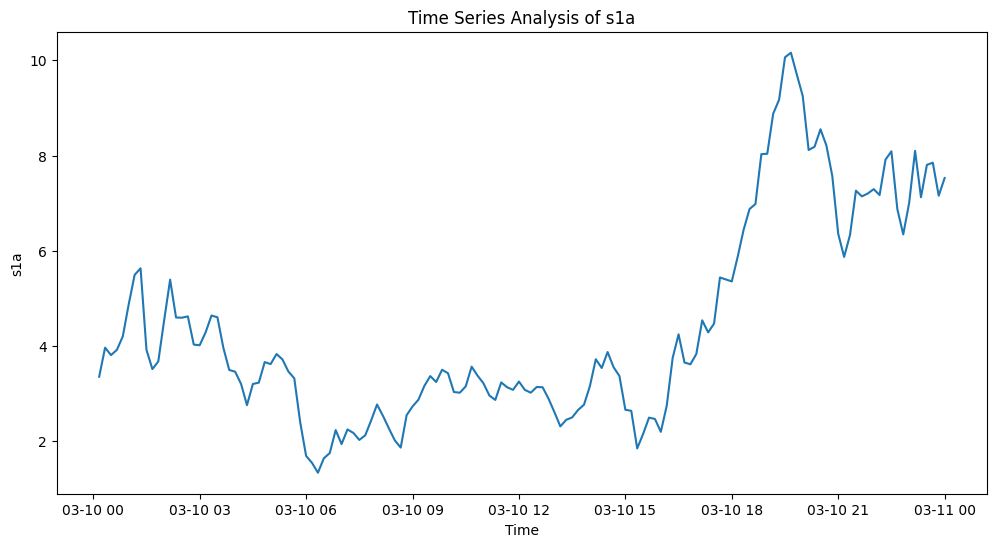

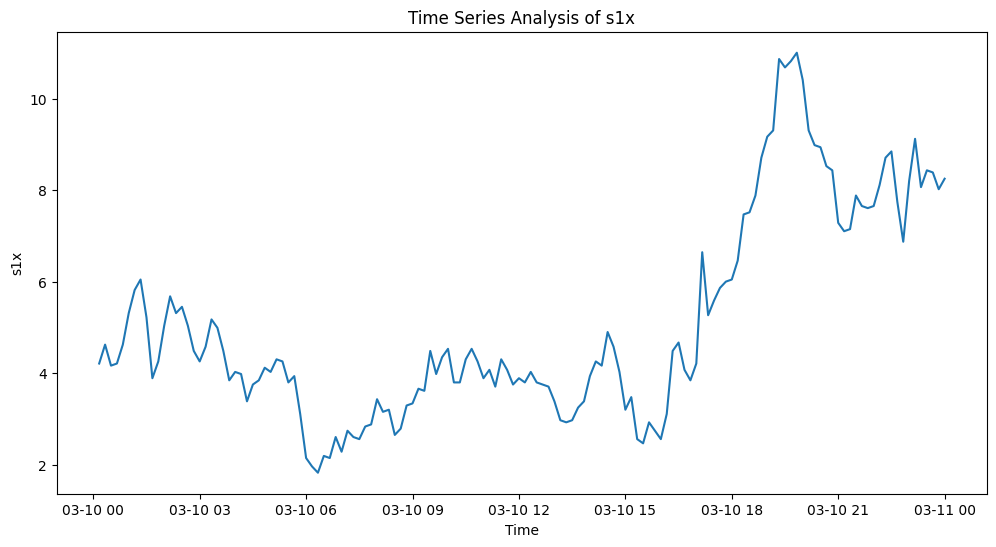

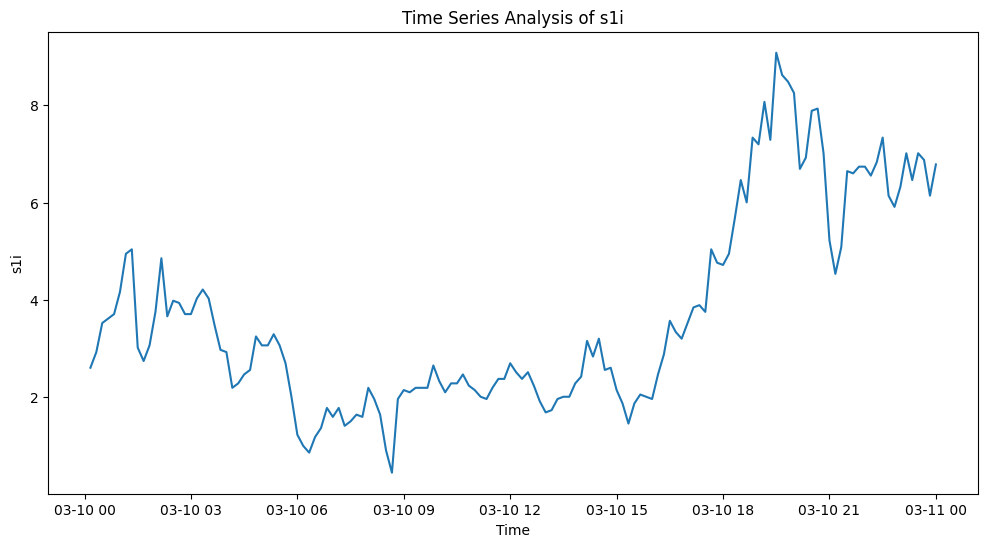

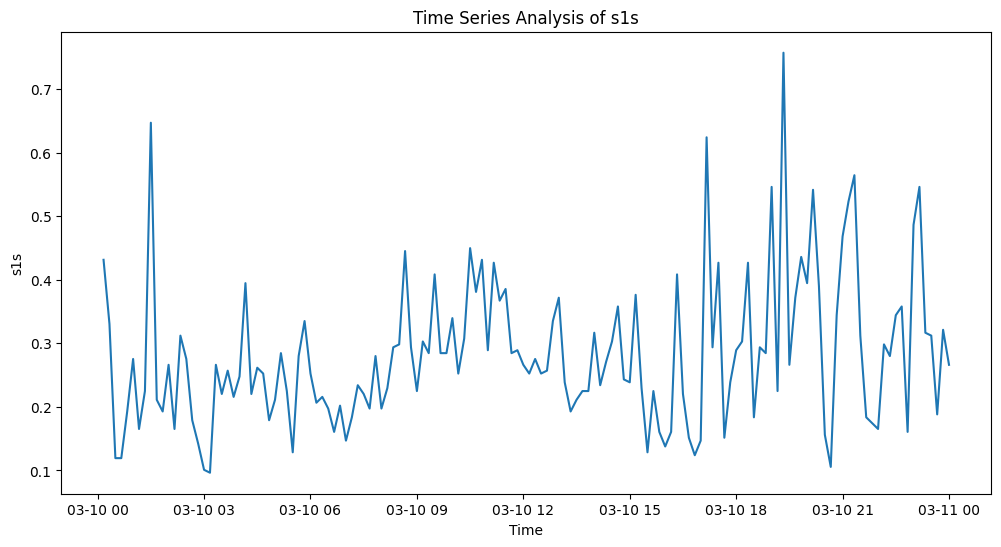

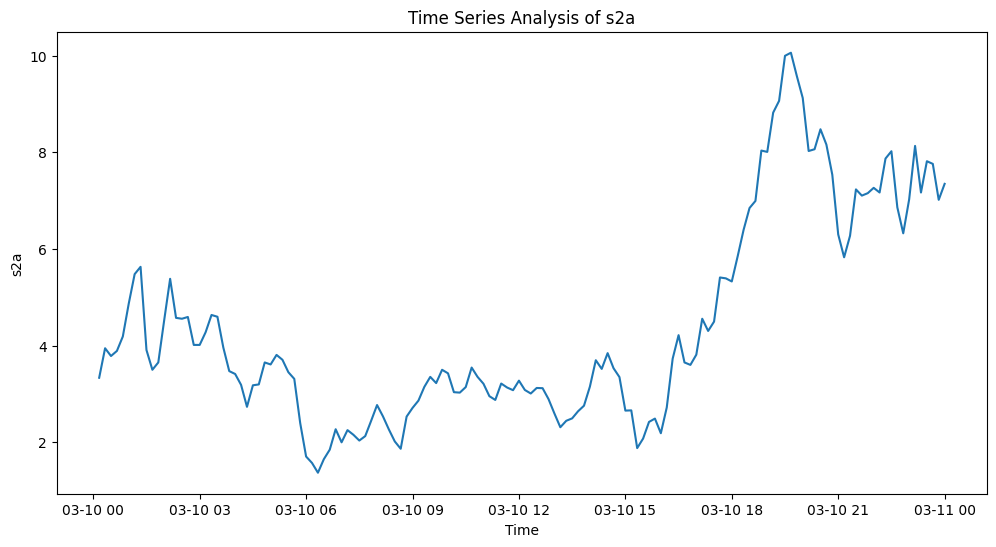

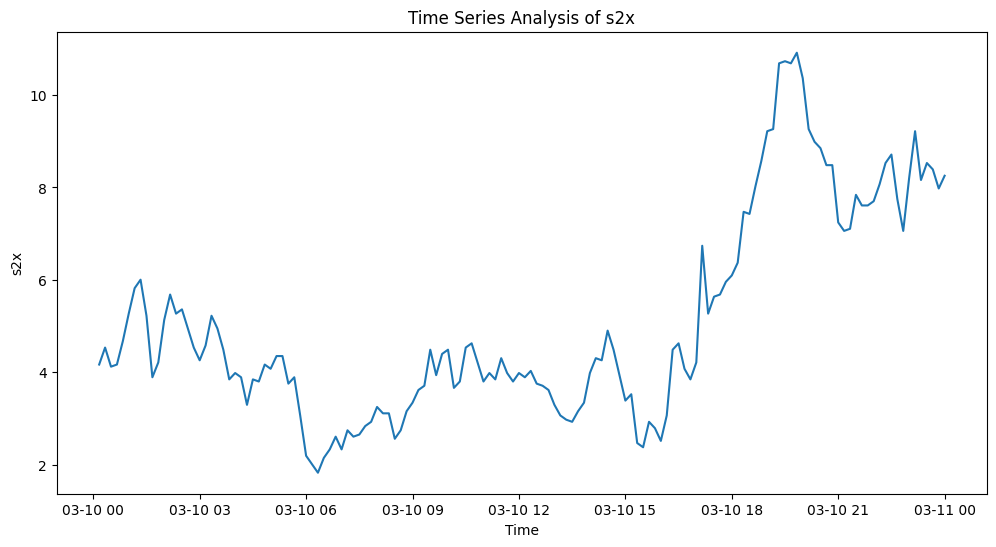

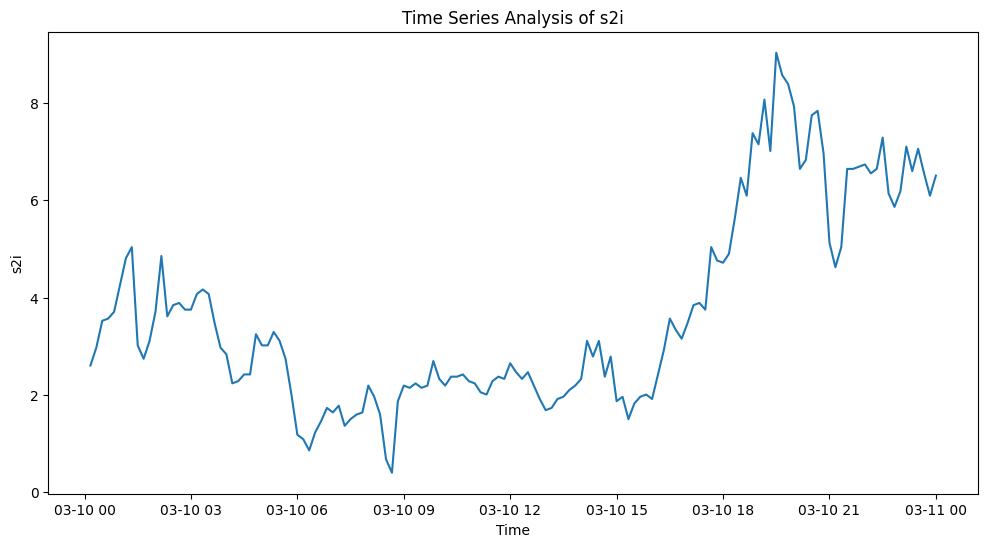

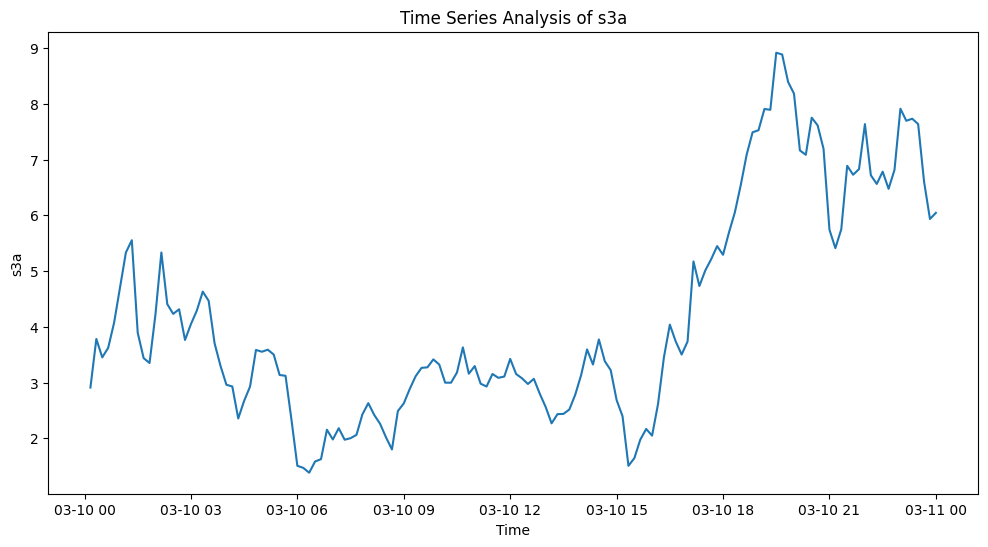

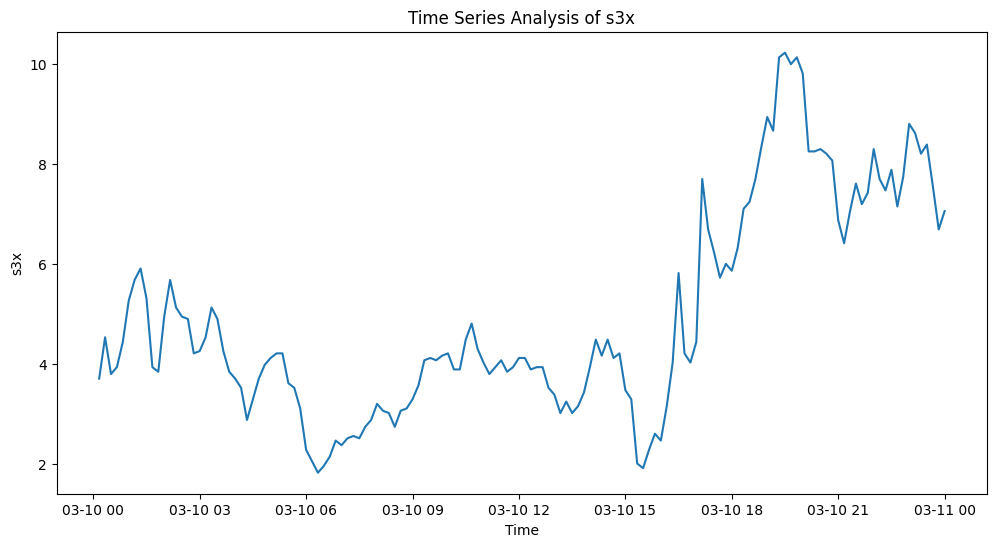

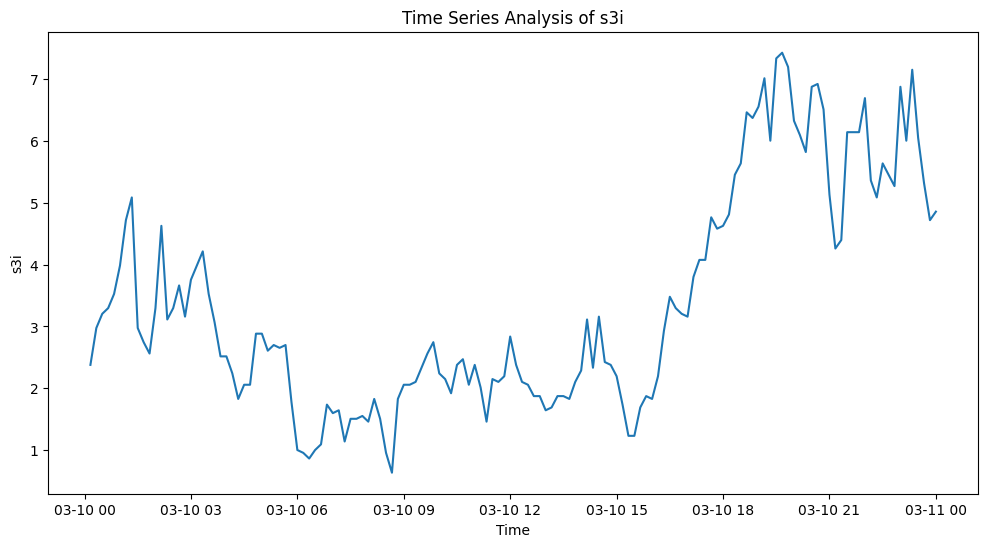

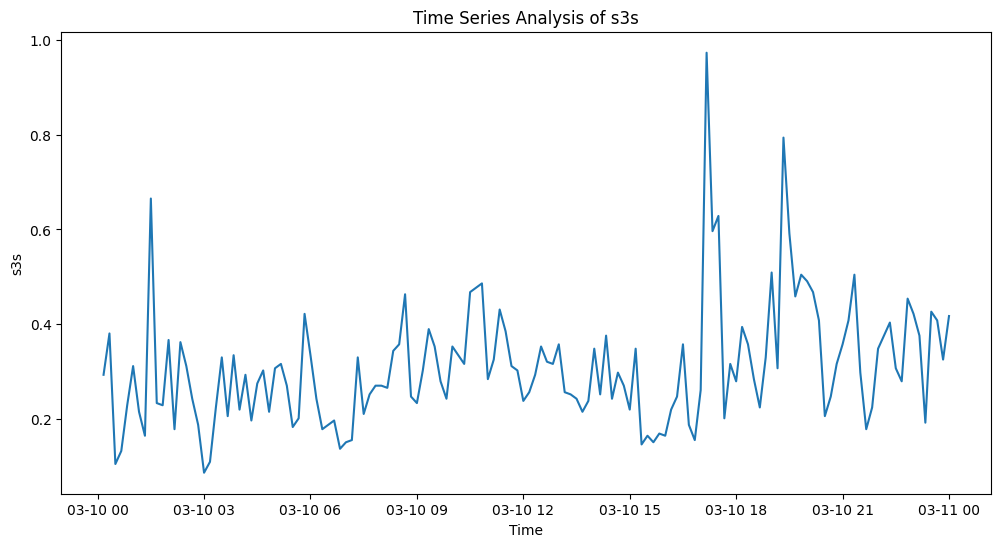

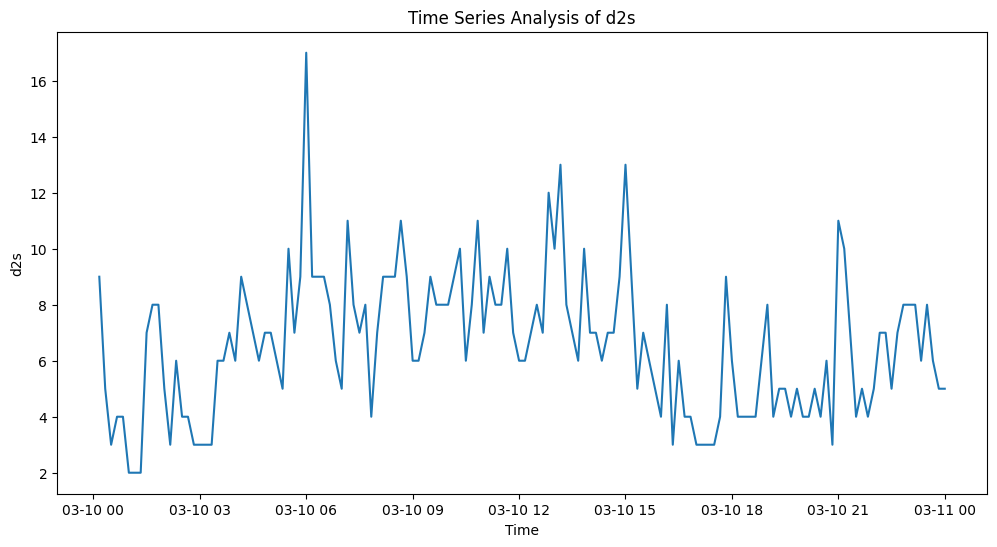

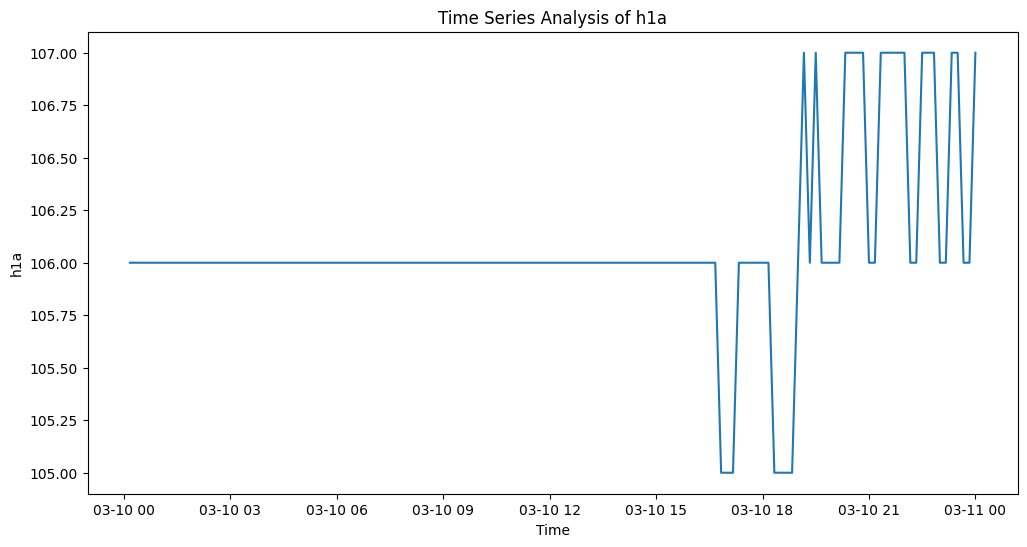

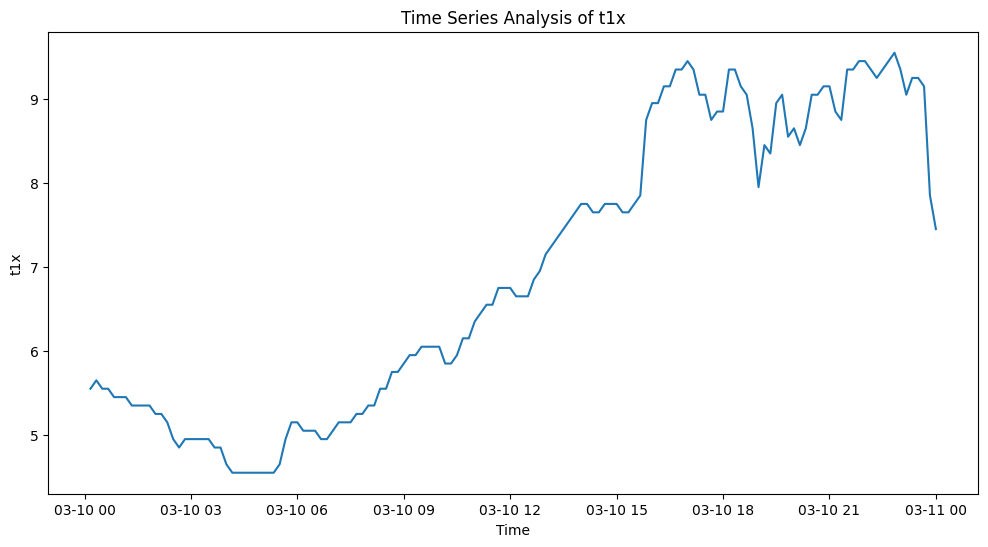

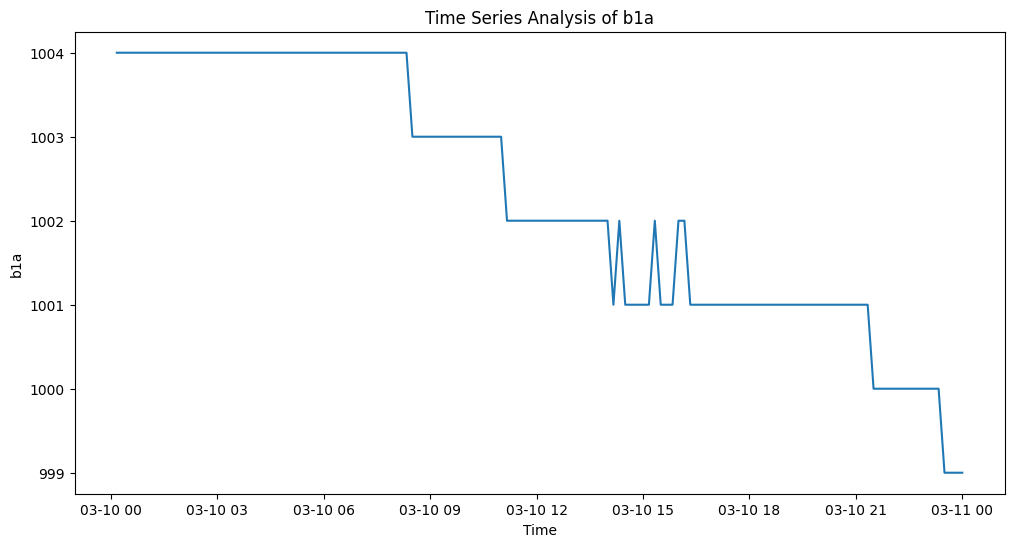

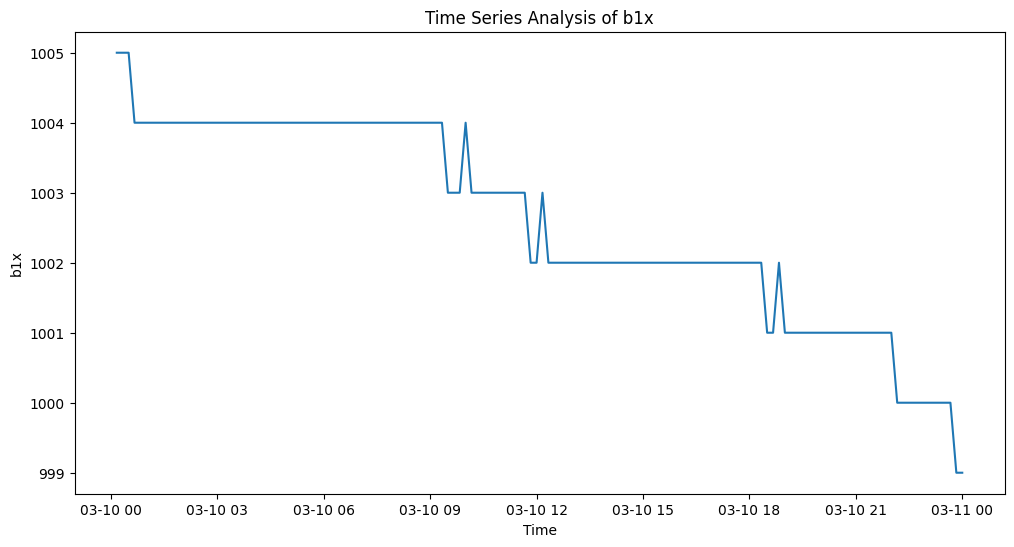

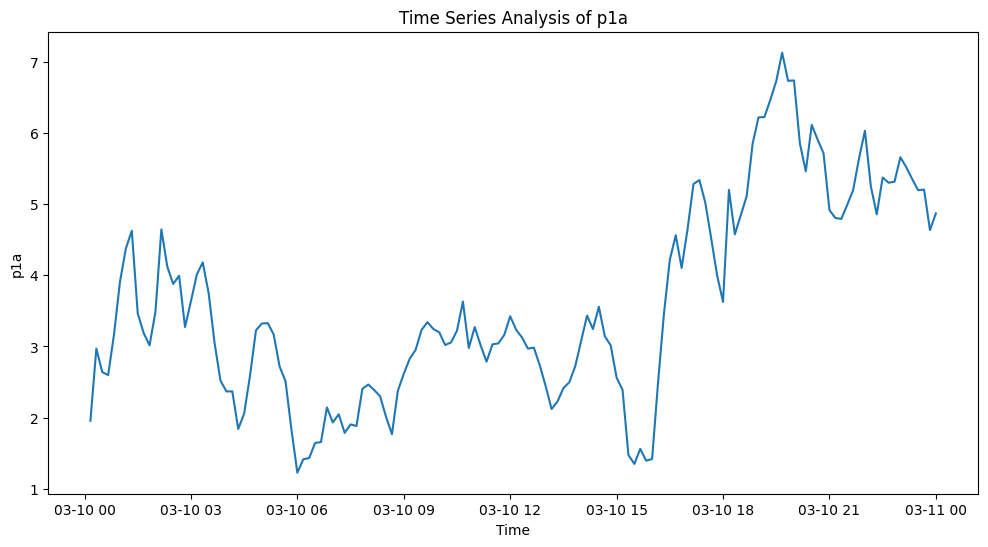

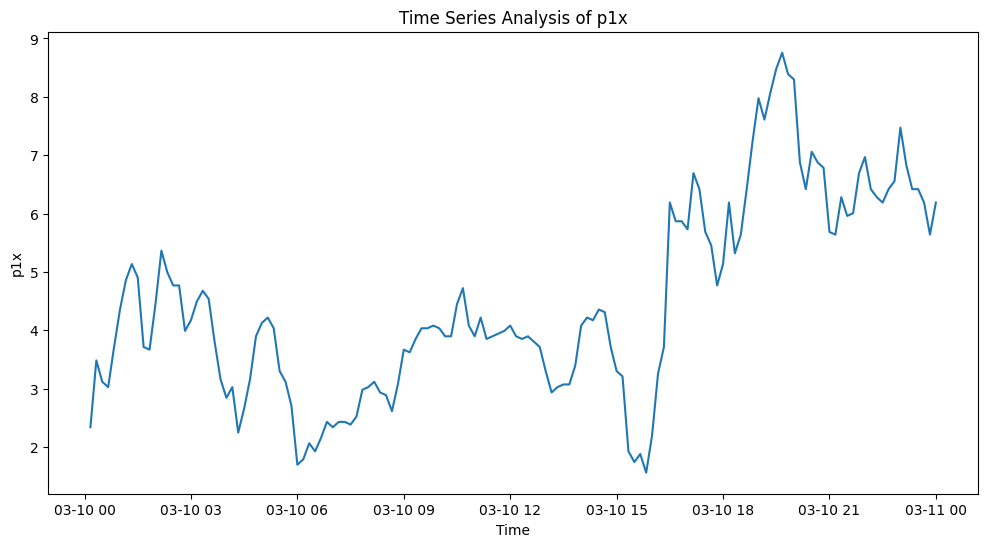

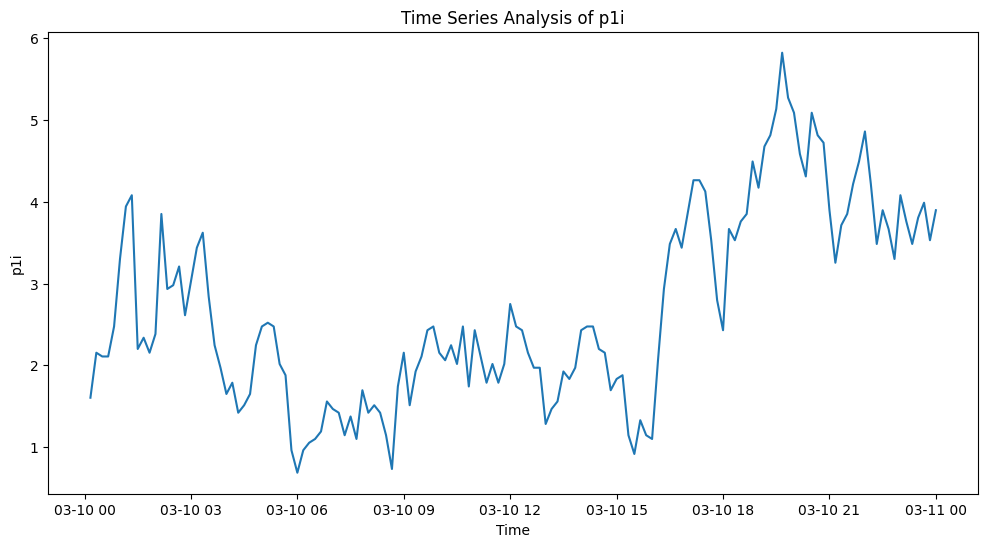

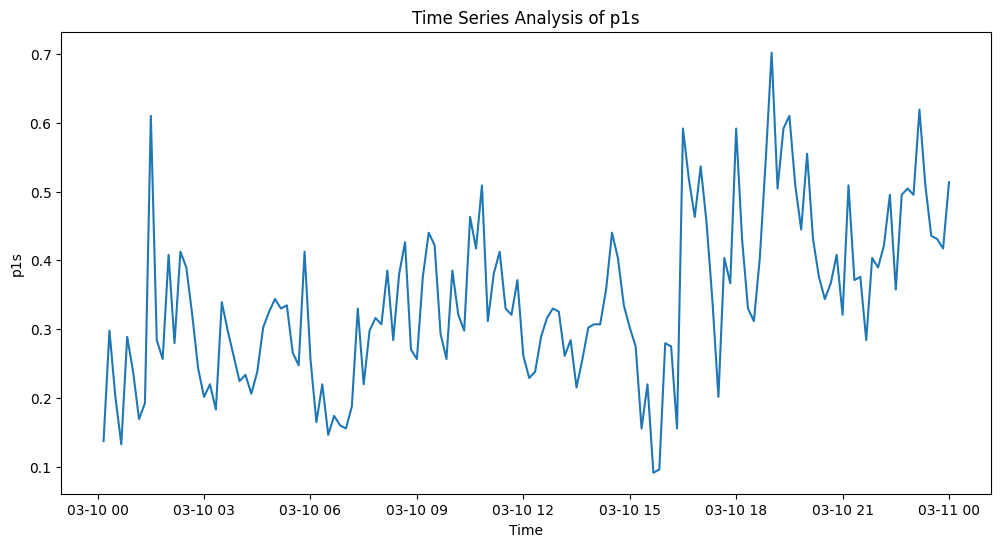

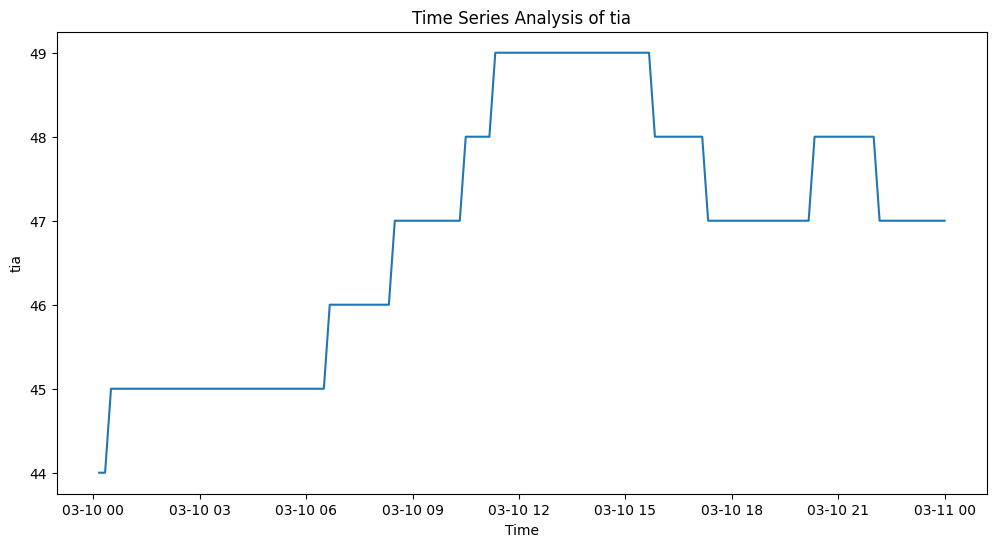

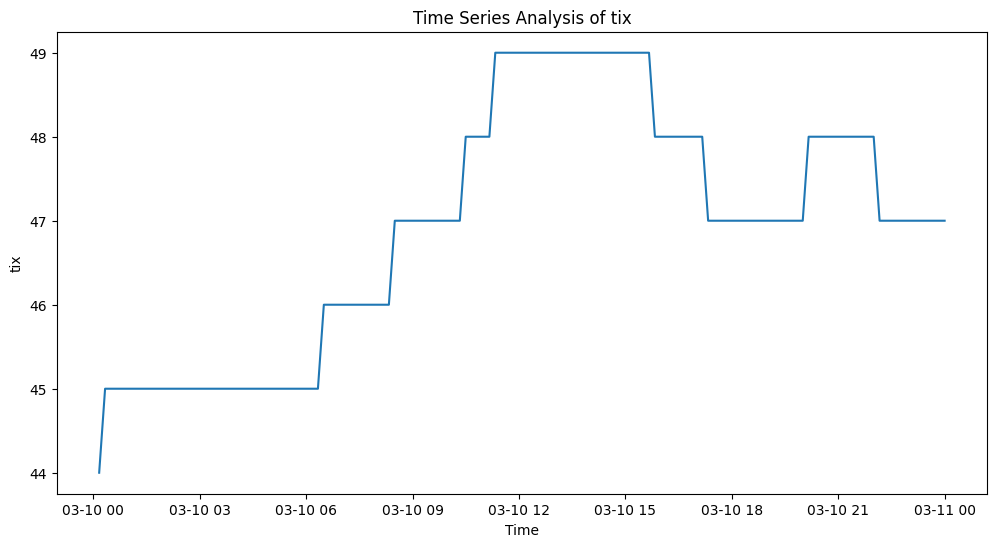

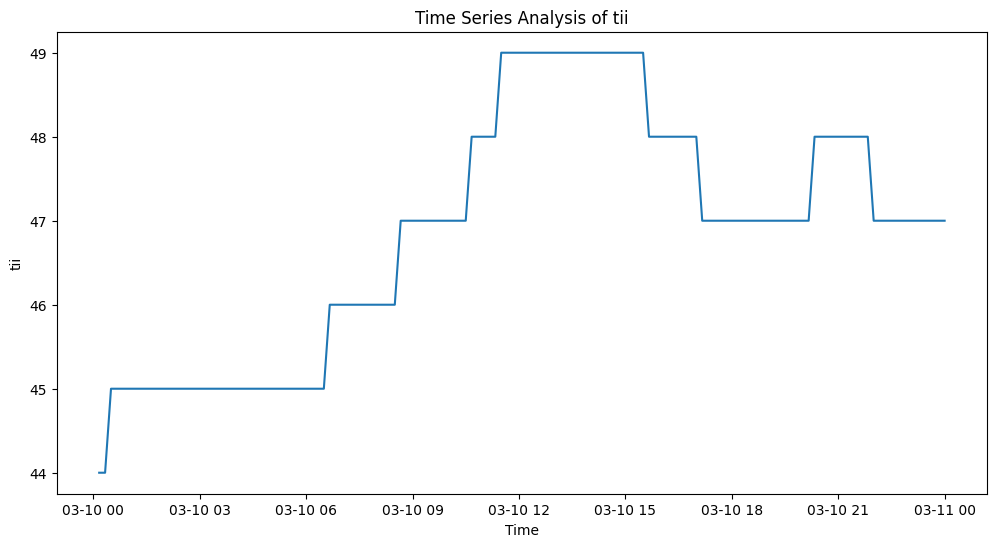

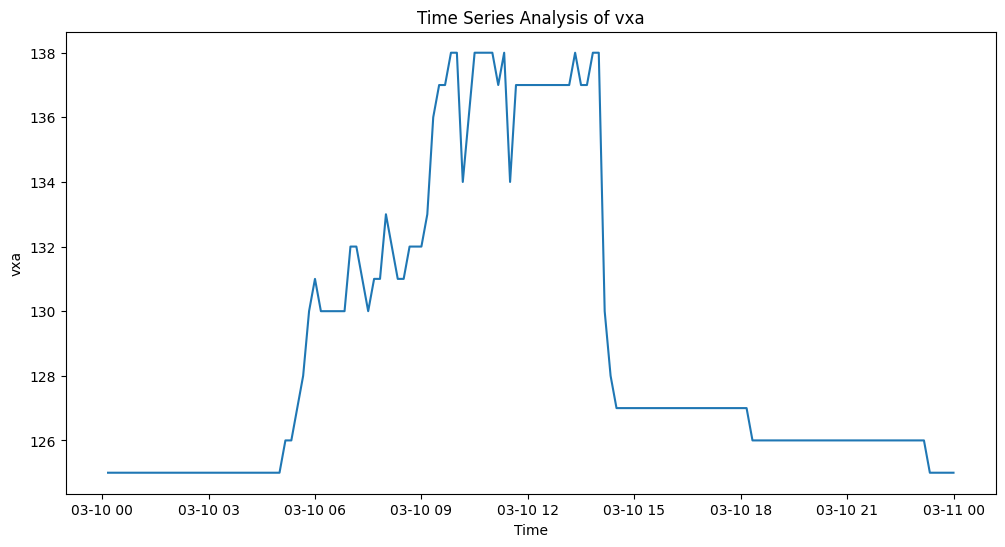

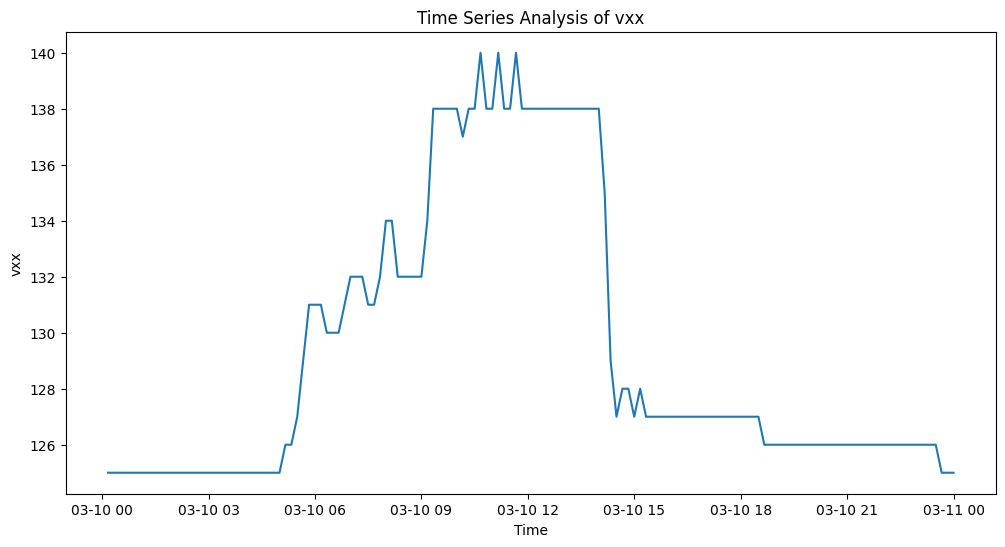

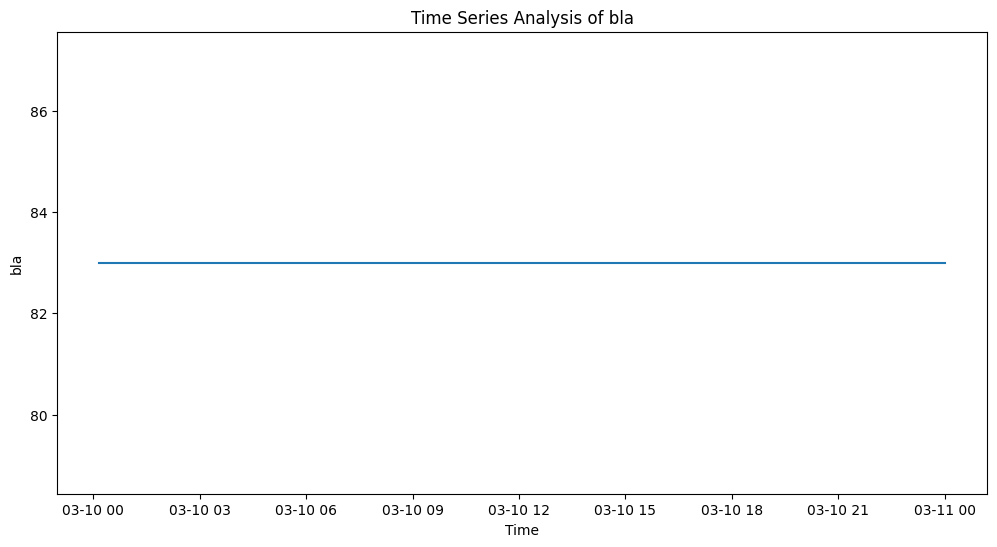

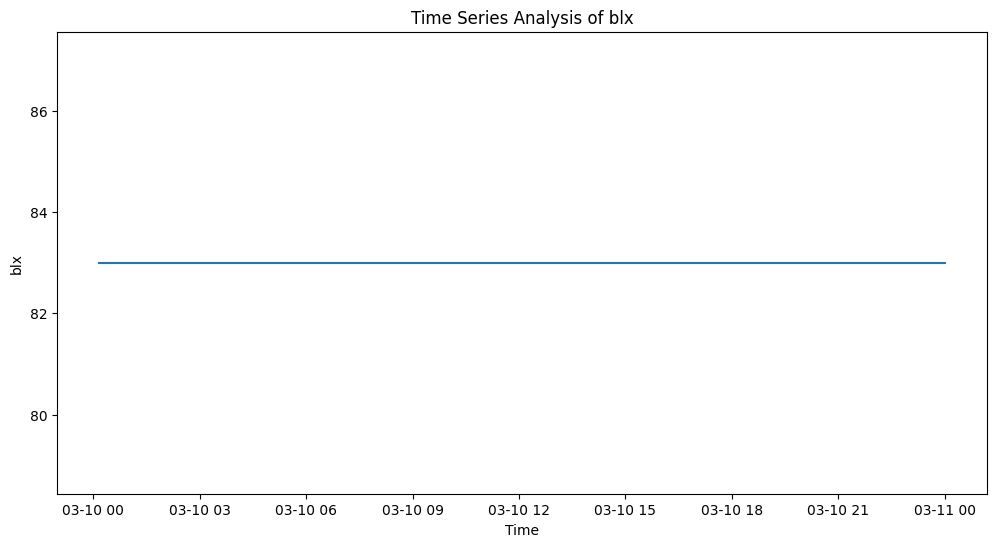

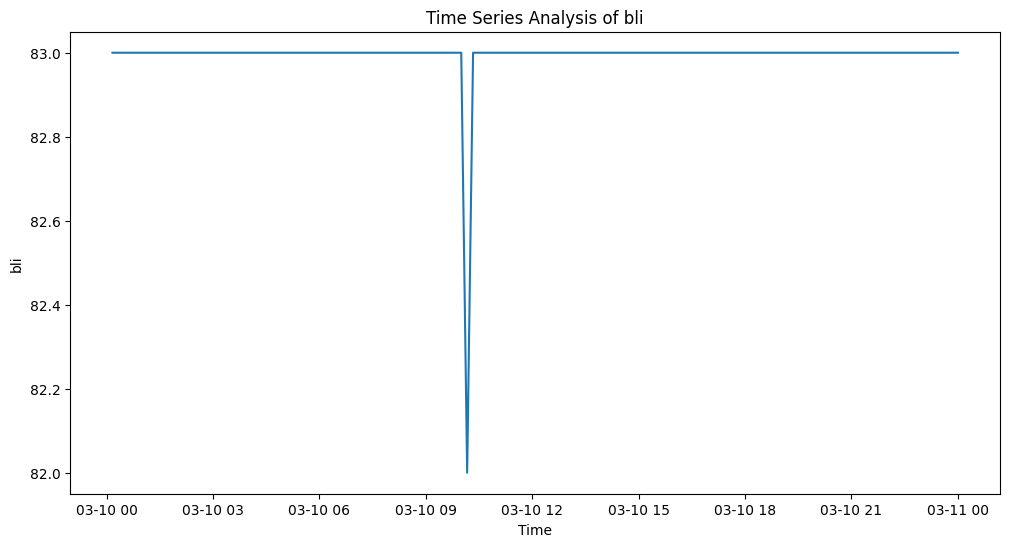

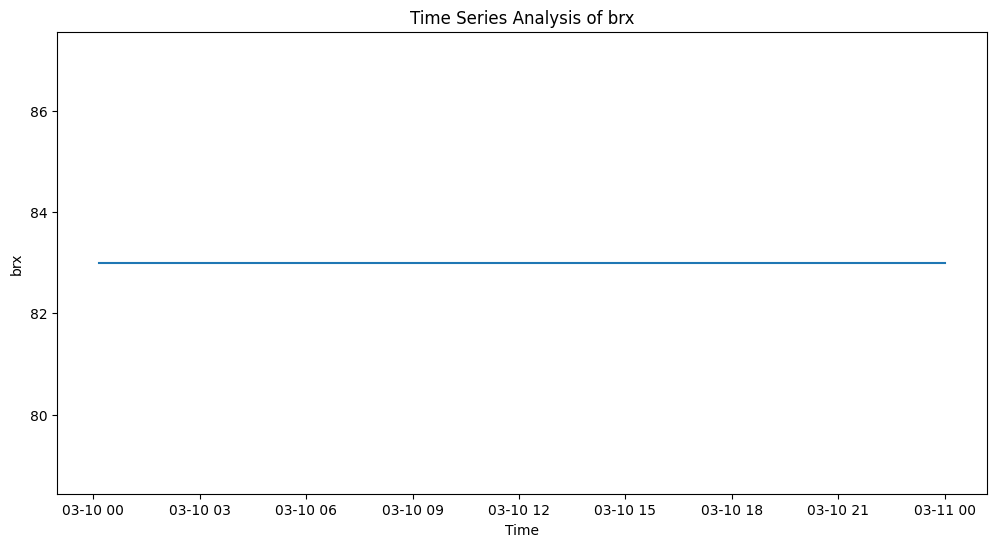

In [6]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [7]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

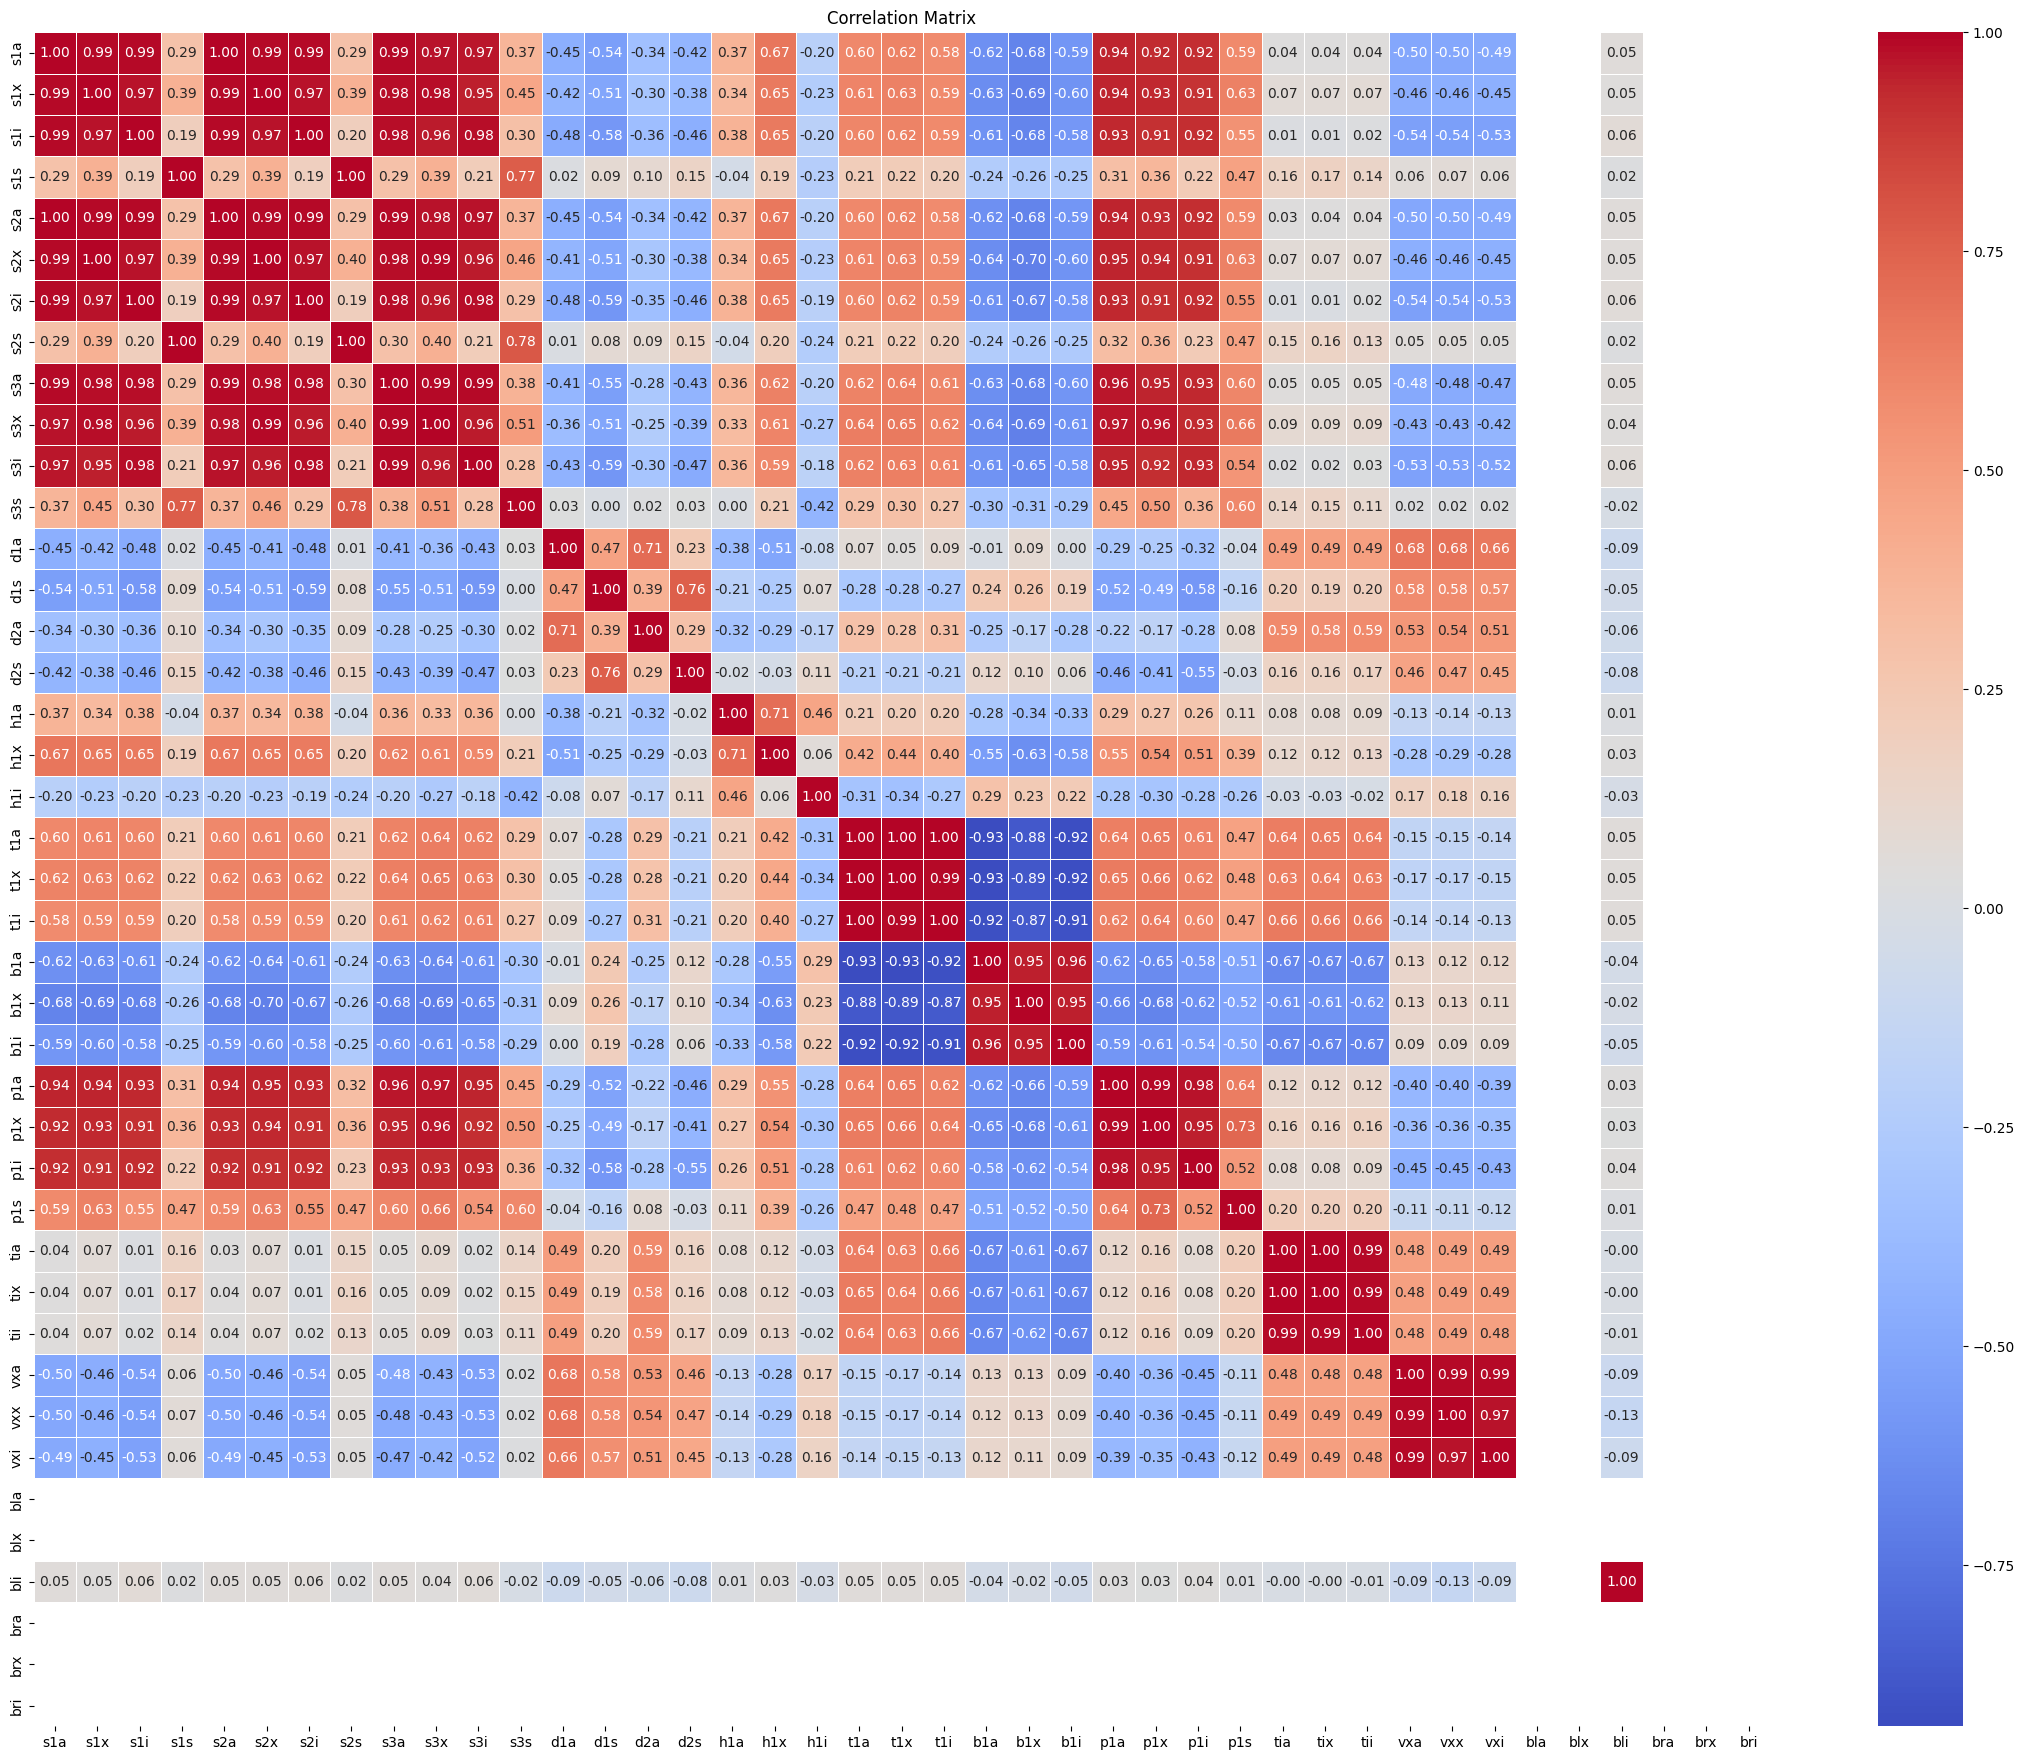

In [8]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

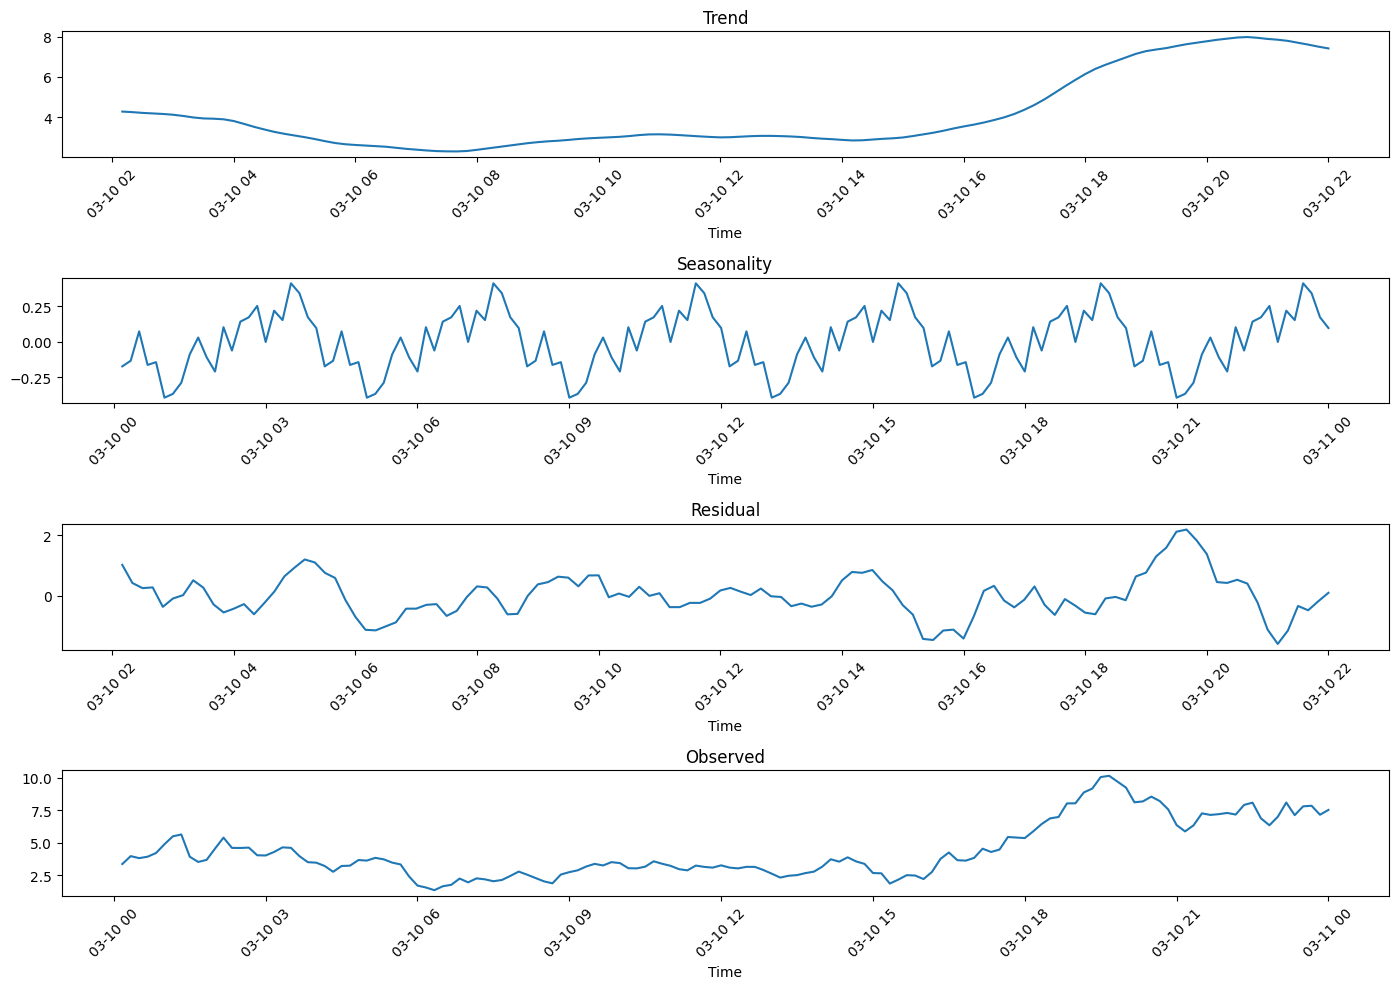

In [9]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


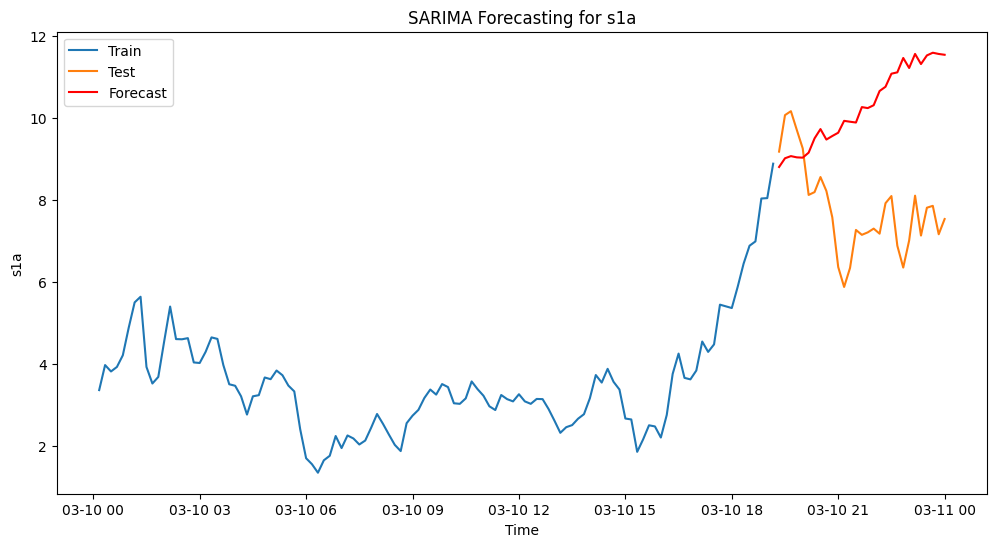

In [10]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()